In [1]:
#Relevat Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px

In [477]:
#Reading the data
data= pd.read_csv('State_time_series.csv')

# DESCRIPTIVE STATISTICS

In [3]:
data.shape

(13212, 82)

In [4]:
data.head()

Date  RegionName  DaysOnZillow_AllHomes  \
0  1996-04-30     Alabama                    NaN   
1  1996-04-30     Arizona                    NaN   
2  1996-04-30    Arkansas                    NaN   
3  1996-04-30  California                    NaN   
4  1996-04-30    Colorado                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_5BedroomOrMore  ...  ZHVI_BottomTier  \
0                                       NaN  ...          45600.0   
1                                       NaN  ...          67100.0   
2                                       NaN  ...          38400.0   
3                                       NaN  ...          95100.0   
4                                       NaN  ...          82700.0   

   ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  \
0         99500.0          79500.0                     79000.0      140200.0   
1         78900.0         103600.0                    107500.0      168700.0   
2         70300.0          64400.0                     64500.0      115200.0   
3        136100.0         157900.0                    162000.0      270600.0   
4         99400.0         128100.0                    133600.0      209300.0   

   ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0           NaN                          NaN                  NaN   
1           NaN                          NaN                  NaN   
2           NaN                          NaN                  NaN   
3           NaN                          NaN                  NaN   
4           NaN                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
0                             NaN                              NaN  
1                             NaN                              NaN  
2                             NaN                              NaN  
3                             NaN                              NaN  
4                             NaN                              NaN  

[5 rows x 82 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

### Points to note:
- Given data is a time-series data.
- Too many columns with null values.
- There are 82 different columns.
- Date is datetime datatype, and RegionName is Categorical datatype.
- Rest of them are of numeric datatype.



In [6]:
#working with dates
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year).astype('int64')



In [7]:
#extracting the month from the date column to understand the seasonality
data['Month'] = [d.strftime("%b") for d in data.Date]
months= data['Month'].unique()

## Univariate Analysis

### RegionName

In [8]:
regions= data['RegionName'].unique()
len(regions)

52

There are 52 different regions in the dataset.

### Days on Zillow

The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December).

In [9]:
days_on_zil= data.groupby('Date')['DaysOnZillow_AllHomes'].median().dropna()

Text(0.5, 1.0, 'Time Vs DaysonZillow')

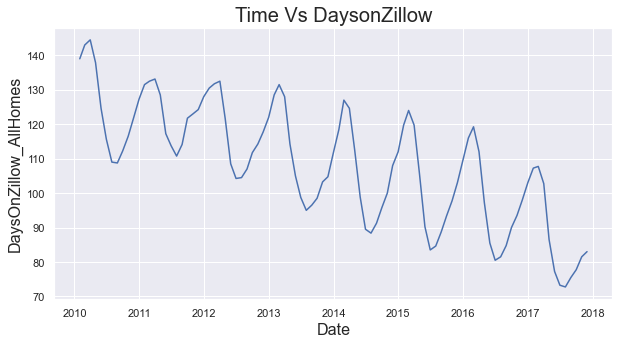

In [323]:
plt.figure(figsize= (10,5))
sns.lineplot( y =days_on_zil.values, x=days_on_zil.index)

plt.xlabel('Date', fontsize=16);
plt.ylabel('DaysOnZillow_AllHomes', fontsize=16);
plt.title('Time Vs DaysonZillow', fontsize=20)

In [326]:
pd.DataFrame(days_on_zil)

DaysOnZillow_AllHomes
Date                             
2010-01-31                139.000
2010-02-28                143.000
2010-03-31                144.500
2010-04-30                137.875
2010-05-31                124.625
...                           ...
2017-07-31                 72.750
2017-08-31                 75.500
2017-09-30                 77.750
2017-10-31                 81.500
2017-11-30                 83.000

[95 rows x 1 columns]

<AxesSubplot:xlabel='Year', ylabel='DaysOnZillow_AllHomes'>

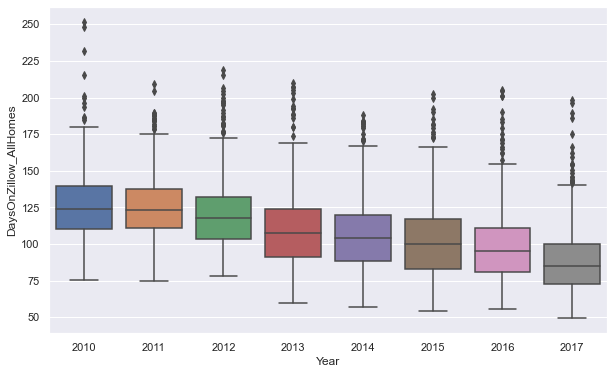

In [329]:
plt.figure(figsize= (10,6))
sns.boxplot(x= data.Year[data.Year>2009], y= data.DaysOnZillow_AllHomes)

The feature seems to be recorded only since 2010. In addition, the DaysOnZillow seems to fall from 140 in 2010 to around 90 in 2017. We can also see seasonal trend of data for this variable.

In [12]:
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar']
days_on_zil_month= data.groupby('Month')['DaysOnZillow_AllHomes'].median()
days_on_zil_month = days_on_zil_month.reindex(months, axis=0)

Text(0.5, 1.0, 'Month Vs DaysonZillow')

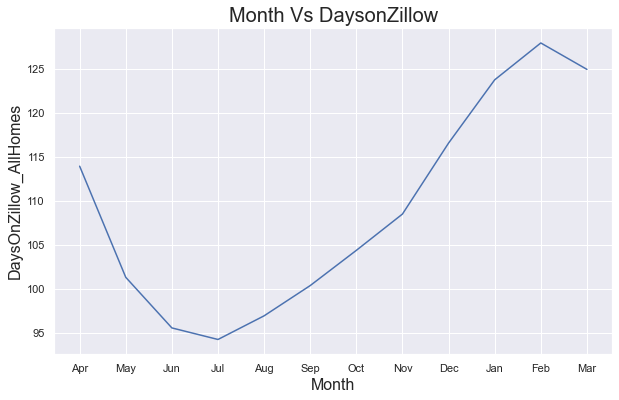

In [331]:
plt.figure(figsize= (10,6))
sns.lineplot( y =days_on_zil_month.values, x=days_on_zil_month.index)

plt.xlabel('Month', fontsize=16);
plt.ylabel('DaysOnZillow_AllHomes', fontsize=16);
plt.title('Month Vs DaysonZillow', fontsize=20)

As discussed of the seasonal behaviour, DaysOnZillow dipped on the month of July and peaked on the month of February.

### InventorySeasonallyAdjusted_AllHomes 

A seasonally adjusted measure of the median of weekly snapshot of for-sale homes within a region for a given month

Text(0.5, 1.0, 'Time Vs AdjustedInventory')

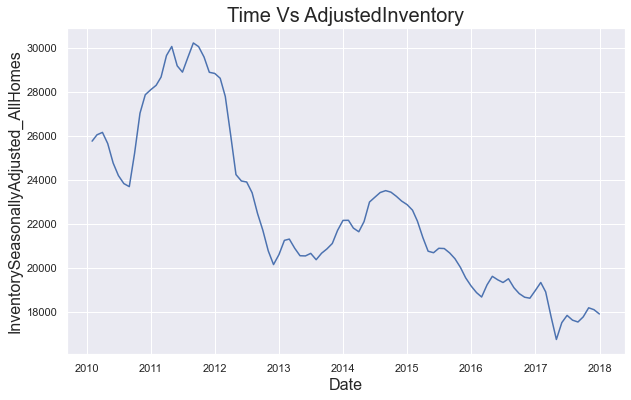

In [335]:
isa_allhomes= data.groupby('Date')['InventorySeasonallyAdjusted_AllHomes'].median().dropna()
plt.figure(figsize= (10,6))
sns.lineplot( y =isa_allhomes.values, x=isa_allhomes.index)

plt.xlabel('Date', fontsize=16);
plt.ylabel('InventorySeasonallyAdjusted_AllHomes', fontsize=16);
plt.title('Time Vs AdjustedInventory', fontsize=20)

### InventoryRaw_AllHomes 

Median of weekly snapshot of for-sale homes within a region for a given month

Text(0.5, 1.0, 'Time Vs RawInventory')

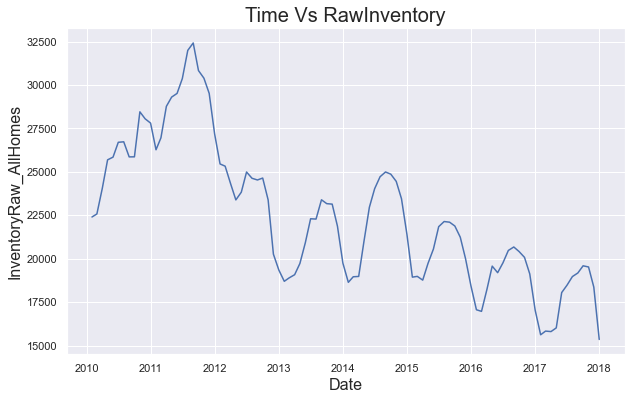

In [334]:
ir_allhomes= data.groupby('Date')['InventoryRaw_AllHomes'].median().dropna()
plt.figure(figsize= (10,6))
sns.lineplot( y =ir_allhomes.values, x=ir_allhomes.index)

plt.xlabel('Date', fontsize=16);
plt.ylabel('InventoryRaw_AllHomes', fontsize=16);
plt.title('Time Vs RawInventory', fontsize=20)


In [16]:
#Finding out maximum and minimum values
ir_max=ir_allhomes[ir_allhomes== ir_allhomes.max()]
ir_min= ir_allhomes[ir_allhomes== ir_allhomes.min()]
print(ir_max, ir_min)

Date
2011-08-31    32420.0
Name: InventoryRaw_AllHomes, dtype: float64 Date
2017-12-31    15362.0
Name: InventoryRaw_AllHomes, dtype: float64


From the above plot, we can observe that for-sale homes inventory also showed a down trending behaviour between 2010 to 2018. 
- Maximum: 32420 [2011]
- Minimum: 15362 [2017]

Text(0.5, 1.0, 'Month Vs InventoryRaw')

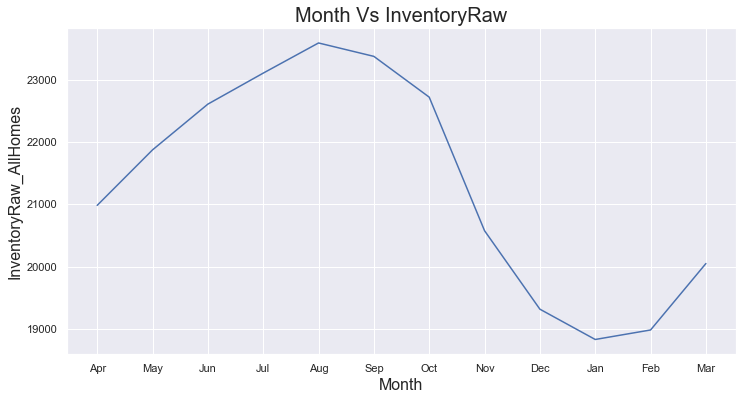

In [336]:
#Inventory Seasonality Plot
ir_allhomes_month= data.groupby('Month')['InventoryRaw_AllHomes'].median()
ir_allhomes_month =ir_allhomes_month.reindex(months, axis=0)
plt.figure(figsize= (12,6))
sns.lineplot( y =ir_allhomes_month.values, x=ir_allhomes_month.index)

plt.xlabel('Month', fontsize=16);
plt.ylabel('InventoryRaw_AllHomes', fontsize=16);
plt.title('Month Vs InventoryRaw', fontsize=20)

From the monthly plot, DaysOnZillow dipped on the month of January and peaked on the month of August.

In [18]:
#Relation between InventoryRaw and DaysOnZillow
days_inv=pd.concat([ir_allhomes_month, days_on_zil_month], axis=1)
days_inv

InventoryRaw_AllHomes  DaysOnZillow_AllHomes
Month                                              
Apr                  20983.5               114.0000
May                  21875.0               101.3750
Jun                  22610.5                95.6250
Jul                  23108.5                94.3125
Aug                  23593.5                97.0000
Sep                  23378.0               100.4375
Oct                  22723.0               104.4375
Nov                  20576.5               108.5625
Dec                  19315.5               116.6250
Jan                  18828.5               123.8125
Feb                  18981.0               128.0000
Mar                  20049.0               125.0000

In [19]:
#Correlation between InventoryRaw and DaysOnZillow
days_inv.corr()

InventoryRaw_AllHomes  DaysOnZillow_AllHomes
InventoryRaw_AllHomes               1.000000              -0.922057
DaysOnZillow_AllHomes              -0.922057               1.000000

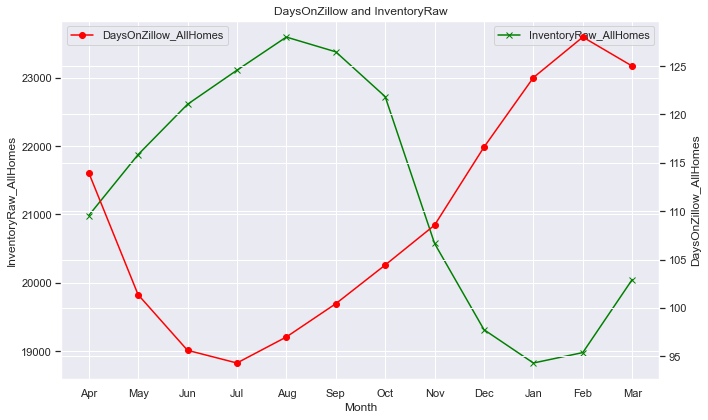

In [342]:
#Relationship Plot
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.set_title('DaysOnZillow and InventoryRaw')
ax.set_xlabel('Month')

ax.plot(days_inv.index, days_inv['InventoryRaw_AllHomes'] , color='green', marker='x')
ax2.plot(days_inv.index,days_inv['DaysOnZillow_AllHomes'] , color='red', marker='o')

ax.set_ylabel('InventoryRaw_AllHomes')
ax2.set_ylabel('DaysOnZillow_AllHomes')
ax.legend(['InventoryRaw_AllHomes'], loc='best')
ax2.legend(['DaysOnZillow_AllHomes'], loc='best')

# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()
plt.show()

The number of days on sale at the exchange and the number of house for sale seem to have an inverse relationship.

### Median Listing Price

- MedianListingPrice:	Median of the list price (or asking price) for homes listed on Zillow

In [345]:
types= ['1Bed','2Bed','3Bed','4Bed','5BedORMore', 'AllHomes','CondoCoop', 'DuplexTriplex', 'SingleFamilyResidence']

In [21]:
listingprice_list= ['MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence']

In [349]:
listingprice= data.groupby('Date')[listingprice_list].median().dropna()
listingprice= listingprice.iloc[:,:6]
listingprice.columns= types[:6]

In [350]:
listingprice

1Bed       2Bed      3Bed       4Bed  5BedORMore  AllHomes
Date                                                                      
2010-01-31  149900.0  148750.00  165000.0  254900.00   365000.00  189450.0
2010-02-28  149900.0  144900.00  166900.0  254700.00   349900.00  187450.0
2010-03-31  149900.0  144900.00  165000.0  254950.00   350000.00  189900.0
2010-04-30  149000.0  140950.00  164900.0  249900.00   355500.00  189000.0
2010-05-31  149900.0  144900.00  164900.0  249850.00   350000.00  187500.0
...              ...        ...       ...        ...         ...       ...
2017-08-31  147300.0  179275.00  227450.0  329450.00   411222.50  246750.0
2017-09-30  148500.0  179424.75  229950.0  327383.00   420950.00  249000.0
2017-10-31  146950.0  176450.00  229900.0  325050.00   430497.50  248950.0
2017-11-30  142950.0  176500.00  228500.0  322721.75   425000.00  249900.0
2017-12-31  141325.0  175000.00  227000.0  325980.00   417541.25  249900.0

[96 rows x 6 columns]

Text(0.5, 1.0, 'Time Vs MedianListingPrice')

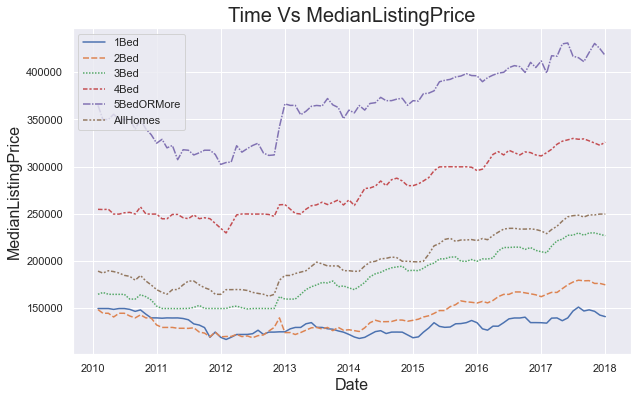

In [351]:
#Comparing time-series of different types of houses over time
plt.figure(figsize=(10,6))
sns.lineplot(data= listingprice)

plt.xlabel('Date', fontsize=16);
plt.ylabel('MedianListingPrice', fontsize=16);
plt.title('Time Vs MedianListingPrice', fontsize=20)


The above vizualization shows the median listing price of houses is in long-term uptrend during the review period.

In [427]:
listprice_median= pd.DataFrame(listingprice.median())
listprice_median.columns= ['ListingPrice_Median']
listprice_median

ListingPrice_Median
1Bed                   131825.0
2Bed                   138187.5
3Bed                   177225.0
4Bed                   264900.0
5BedORMore             365000.0
AllHomes               195000.0

Text(0.5, 1.0, 'Type Vs MedianListingPrice')

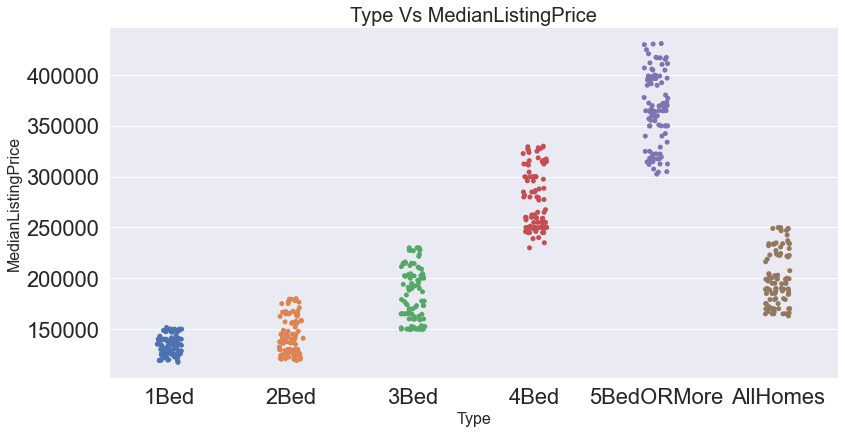

In [359]:
sns.catplot(data= listingprice, height=6, aspect=2)

plt.xlabel('Type', fontsize=16);
plt.ylabel('MedianListingPrice', fontsize=16);
plt.title('Type Vs MedianListingPrice', fontsize=20)


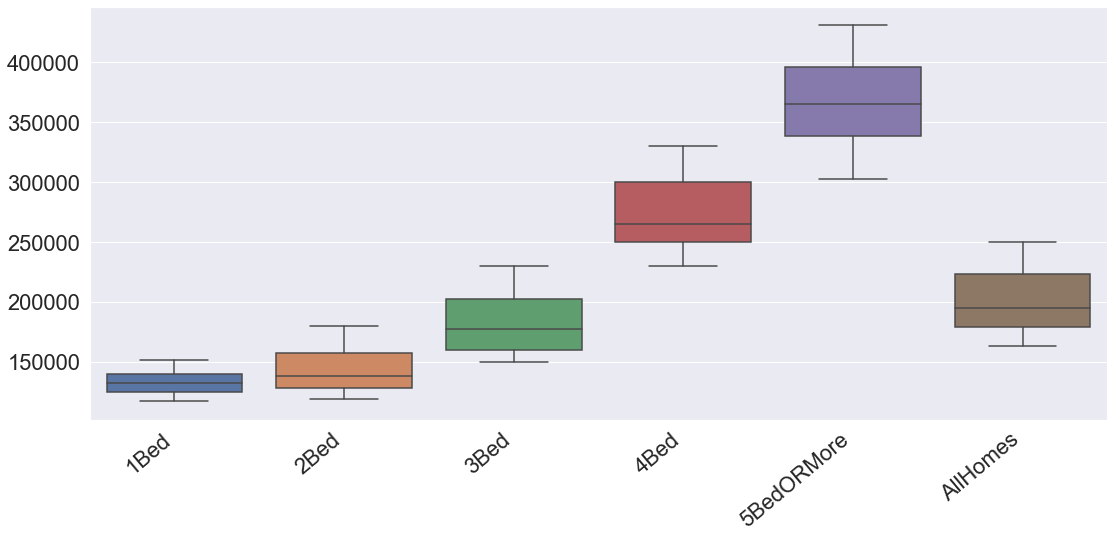

[Text(0, 0, '1Bed'),
 Text(1, 0, '2Bed'),
 Text(2, 0, '3Bed'),
 Text(3, 0, '4Bed'),
 Text(4, 0, '5BedORMore'),
 Text(5, 0, 'AllHomes')]

In [360]:
plt.figure(figsize=(16,8))

ax = sns.boxplot(data= listingprice)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
ax.set_xticklabels(labels=listingprice.columns,rotation=45)


From the above visualization , we can observe the listing price of houses increase as the number of room increases. The houses with 5 or more bedrooms seem to be the ones with highest listing price. 

### MedianListingPricePerSqft

- MedianListingPricePerSqft: Median of list prices divided by the square footage of a home

In [25]:
lp_persqft_list= ['MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence']

In [362]:
sns.set(font_scale=1)

Text(0.5, 1.0, 'Time Vs MedianListingPricePerSqft')

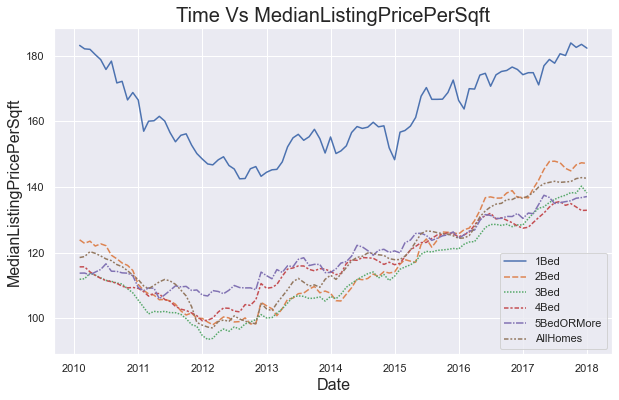

In [364]:
lp_persqft= data.groupby('Date')[lp_persqft_list].median().dropna()
lp_persqft= lp_persqft.iloc[:,:6]
lp_persqft.columns= types[:6]
#Comparing time-series of different types of houses over time

plt.figure(figsize=(10,6))
sns.lineplot(data= lp_persqft)

plt.xlabel('Date', fontsize=16);
plt.ylabel('MedianListingPricePerSqft', fontsize=16);
plt.title('Time Vs MedianListingPricePerSqft', fontsize=20)

In [428]:
listpricepersqft_median= pd.DataFrame(lp_persqft.median())
listpricepersqft_median.columns= ['ListingPricePerSqft_Median']
listpricepersqft_median

ListingPricePerSqft_Median
1Bed                        160.037546
2Bed                        114.187053
3Bed                        111.675091
4Bed                        115.823103
5BedORMore                  117.052404
AllHomes                    118.002222

Text(0.5, 1.0, 'Type Vs MedianListingPricePerSqft')

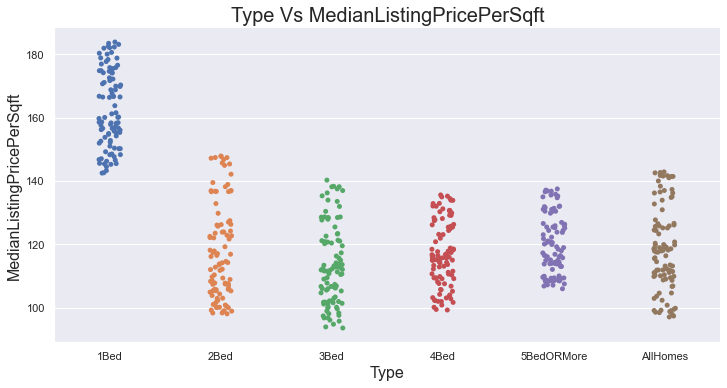

In [367]:
sns.catplot(data= lp_persqft, height=5, aspect=2)

plt.xlabel('Type', fontsize=16);
plt.ylabel('MedianListingPricePerSqft', fontsize=16);
plt.title('Type Vs MedianListingPricePerSqft', fontsize=20)


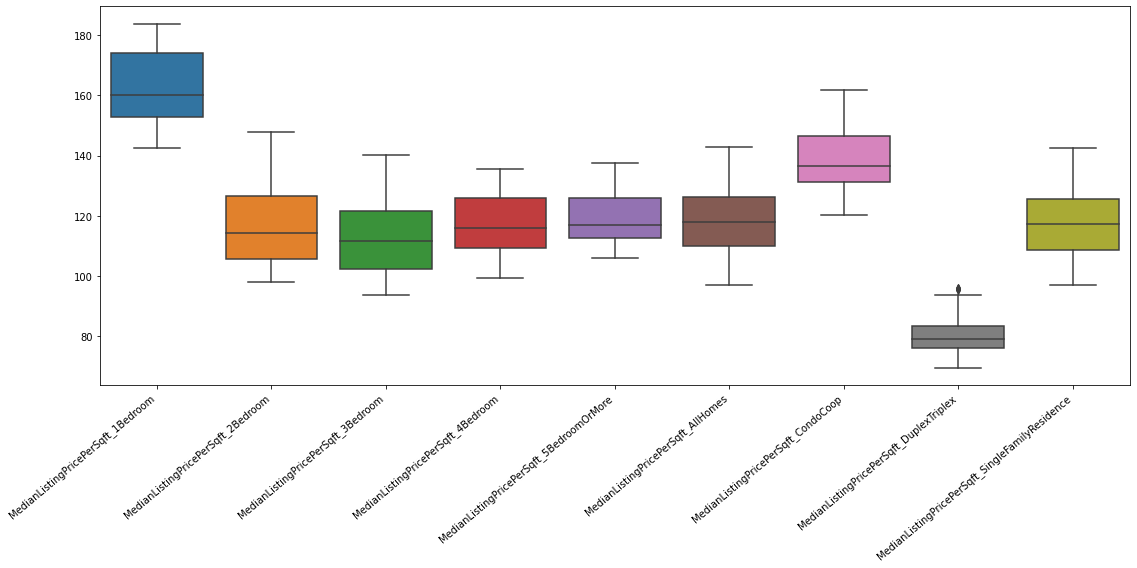

[Text(0, 0, 'MedianListingPricePerSqft_1Bedroom'),
 Text(1, 0, 'MedianListingPricePerSqft_2Bedroom'),
 Text(2, 0, 'MedianListingPricePerSqft_3Bedroom'),
 Text(3, 0, 'MedianListingPricePerSqft_4Bedroom'),
 Text(4, 0, 'MedianListingPricePerSqft_5BedroomOrMore'),
 Text(5, 0, 'MedianListingPricePerSqft_AllHomes'),
 Text(6, 0, 'MedianListingPricePerSqft_CondoCoop'),
 Text(7, 0, 'MedianListingPricePerSqft_DuplexTriplex'),
 Text(8, 0, 'MedianListingPricePerSqft_SingleFamilyResidence')]

In [27]:
#Boxplot
plt.figure(figsize=(16,8))
ax = sns.boxplot(data= lp_persqft)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
ax.set_xticklabels(labels=lp_persqft.columns,rotation=45)


From the above visualization , we can observe the listing price per square feet of houses increases as the number of room decreases. The houses with 1 bedroom seem to be the ones with highest per square feet listing price. 

In [28]:
#Relation between Price and PricePerSqft
list_reln=pd.concat([listingprice, lp_persqft], axis=1)
list_reln_allhomes= list_reln[['MedianListingPrice_AllHomes','MedianListingPricePerSqft_AllHomes' ]]
list_reln_allhomes

MedianListingPrice_AllHomes  MedianListingPricePerSqft_AllHomes
Date                                                                       
2010-01-31                     189450.0                          118.525641
2010-02-28                     187450.0                          118.805281
2010-03-31                     189900.0                          120.316027
2010-04-30                     189000.0                          119.801138
2010-05-31                     187500.0                          119.000000
...                                 ...                                 ...
2017-08-31                     246750.0                          141.526828
2017-09-30                     249000.0                          141.649877
2017-10-31                     248950.0                          142.535607
2017-11-30                     249900.0                          142.842103
2017-12-31                     249900.0                          142.644978

[96 rows x 2 columns]

In [29]:
list_reln_allhomes.corr()

MedianListingPrice_AllHomes  \
MedianListingPrice_AllHomes                            1.000000   
MedianListingPricePerSqft_AllHomes                     0.946956   

                                    MedianListingPricePerSqft_AllHomes  
MedianListingPrice_AllHomes                                   0.946956  
MedianListingPricePerSqft_AllHomes                            1.000000

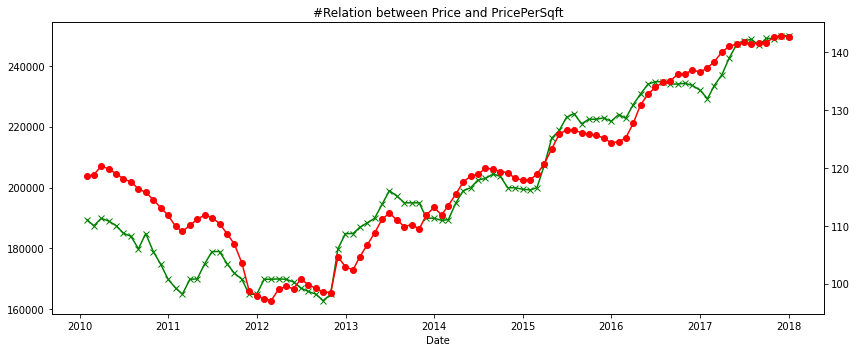

In [30]:
#Relationship Plot
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('#Relation between Price and PricePerSqft')
ax.set_xlabel('Date')

ax.plot(list_reln_allhomes.index,  list_reln_allhomes['MedianListingPrice_AllHomes'], color='green', marker='x')
ax2.plot(list_reln_allhomes.index, list_reln_allhomes['MedianListingPricePerSqft_AllHomes' ] , color='red', marker='o')

# ax.set_ylabel('InventoryRaw_AllHomes')
# ax2.set_ylabel('DaysOnZillow_AllHomes')
# ax.legend(['GDP Per Capita (US $)'])
# ax2.legend(['Annual Growth Rate (%)'], loc='upper center')

# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()
plt.show()

In [31]:
#ListingPrice and ListingPricePerSqft
types= ['1Bed','2Bed','3Bed','4Bed','5BedORMore', 'AllHomes','CondoCoop', 'DuplexTriplex', 'SingleFamilyResidence']
details= {
    'Types': types, 
    'MedianListingPrice': list_reln.iloc[:, :9].mean().values,
    'MedianListingPricePerSqft':list_reln.iloc[:, 9:].mean().values,}
listing_vs_persqft= pd.DataFrame(details)
listing_vs_persqft

Types  MedianListingPrice  MedianListingPricePerSqft
0                   1Bed       132996.229167                 162.654744
1                   2Bed       142647.000000                 117.794838
2                   3Bed       182105.494792                 113.346473
3                   4Bed       276939.984375                 116.960685
4             5BedORMore       365493.489583                 119.537861
5               AllHomes       200928.752604                 118.545744
6              CondoCoop       184309.820312                 138.783676
7          DuplexTriplex       173255.544271                  80.274819
8  SingleFamilyResidence       201541.205729                 118.042487

C:\Users\USER\AppData\Local\Temp/ipykernel_15216/1211187514.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



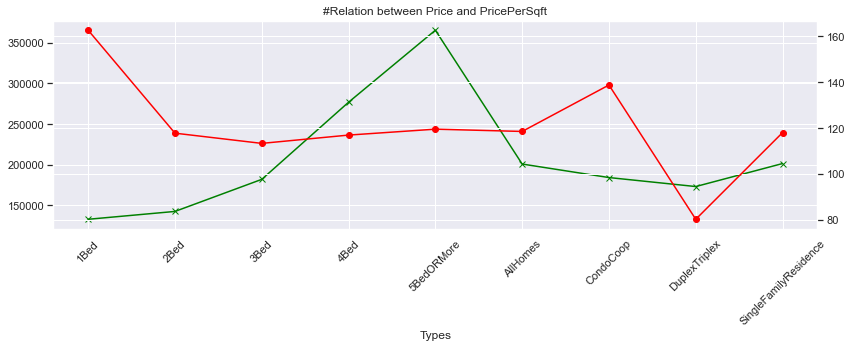

In [368]:
#Relationship Plot
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('#Relation between Price and PricePerSqft')
ax.set_xlabel('Types')

ax.plot(listing_vs_persqft['Types'], listing_vs_persqft['MedianListingPrice'] , color='green', marker='x')
ax2.plot(listing_vs_persqft['Types'], listing_vs_persqft['MedianListingPricePerSqft'] , color='red', marker='o')

# ax.set_ylabel('InventoryRaw_AllHomes')
# ax2.set_ylabel('DaysOnZillow_AllHomes')
# ax.legend(['GDP Per Capita (US $)'])
# ax2.legend(['Annual Growth Rate (%)'], loc='upper center')

# ax.set_xticks(gdp['date'].dt.date)
ax.set_xticklabels(listing_vs_persqft['Types'], rotation=45)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()
plt.show()

### MedianPctOfPriceReduction_AllHomes

- MedianPctOfPriceReduction:	Median of the percentage price reduction for homes with a price reduction during the month.

<AxesSubplot:xlabel='Date'>

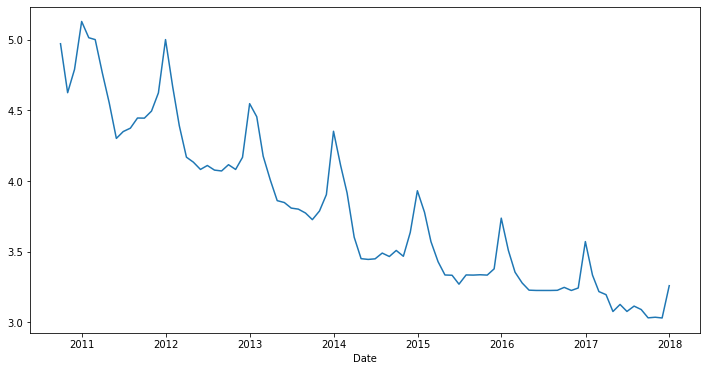

In [33]:
price_red= data.groupby('Date')['MedianPctOfPriceReduction_AllHomes'].median().dropna()
plt.figure(figsize= (12,6))
sns.lineplot( y =price_red.values, x=price_red.index)

### MedianPriceCutDollar_AllHomes

<AxesSubplot:xlabel='Date'>

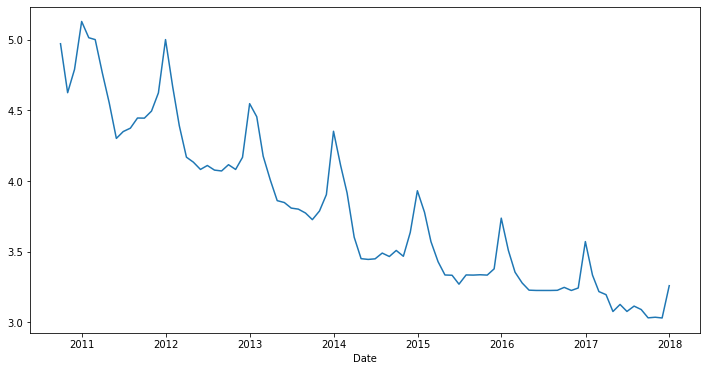

In [34]:
pricecutdollar= data.groupby('Date')['MedianPctOfPriceReduction_AllHomes'].median().dropna()
plt.figure(figsize= (12,6))
sns.lineplot( y =price_red.values, x=pricecutdollar.index)

### Median Rental Price

- MedianRentalPrice: Median of the rental price of homes listed for rent on Zillow in a given region.

In [35]:
rent_houses_list= ['MedianRentalPrice_1Bedroom',
       'MedianRentalPrice_2Bedroom', 'MedianRentalPrice_3Bedroom',
       'MedianRentalPrice_4Bedroom', 'MedianRentalPrice_5BedroomOrMore',
       'MedianRentalPrice_AllHomes', 'MedianRentalPrice_CondoCoop',
       'MedianRentalPrice_DuplexTriplex',
       'MedianRentalPrice_MultiFamilyResidence5PlusUnits',
       'MedianRentalPrice_SingleFamilyResidence', 'MedianRentalPrice_Studio']

<AxesSubplot:xlabel='Date'>

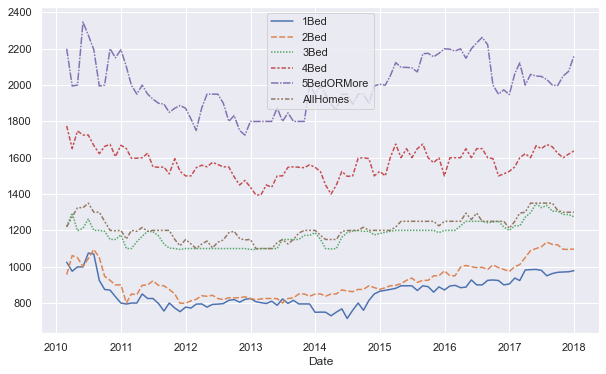

In [369]:
rent= data.groupby('Date')[rent_houses_list].median().dropna()
rent= rent.iloc[:,:6]
rent.columns= types[:6]
#Comparing time-series of different types of houses over time
plt.figure(figsize=(10,6))
sns.lineplot(data= rent)

In [353]:
sns.set(font_scale=1)

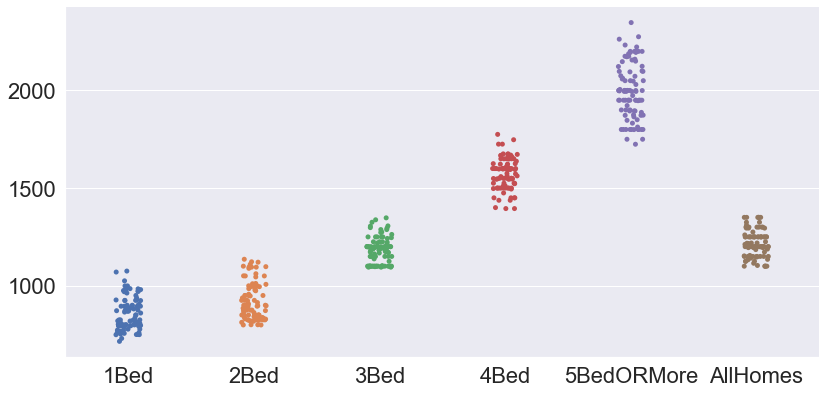

In [356]:
#Catplot
# plt.figure(figsize=(8,6))
ax = sns.catplot(data= rent, height=6, aspect=2)


### MedianRentalPricePerSqft

- MedianRentalPricePerSqft:	Median of the rental price per square foot of homes listed for rent on Zillow in a given region.

In [39]:
rent_persqft_houses= ['MedianRentalPricePerSqft_1Bedroom',
       'MedianRentalPricePerSqft_2Bedroom',
       'MedianRentalPricePerSqft_3Bedroom',
       'MedianRentalPricePerSqft_4Bedroom',
       'MedianRentalPricePerSqft_5BedroomOrMore',
       'MedianRentalPricePerSqft_AllHomes',
       'MedianRentalPricePerSqft_CondoCoop',
       'MedianRentalPricePerSqft_DuplexTriplex',
       'MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits',
       'MedianRentalPricePerSqft_SingleFamilyResidence',
       'MedianRentalPricePerSqft_Studio']

In [40]:
rent_persqft= data.groupby('Date')[rent_persqft_houses].median().dropna()
rent_persqft= rent_persqft.iloc[:,:6]
rent_persqft.columns= types[:6]
#Comparing time-series of different types of houses over time
fig = px.line(rent_persqft)
fig.show()

# plt.figure(figsize=(16,8))
# sns.lineplot(data= rent_persqft)

<Figure size 576x432 with 0 Axes>

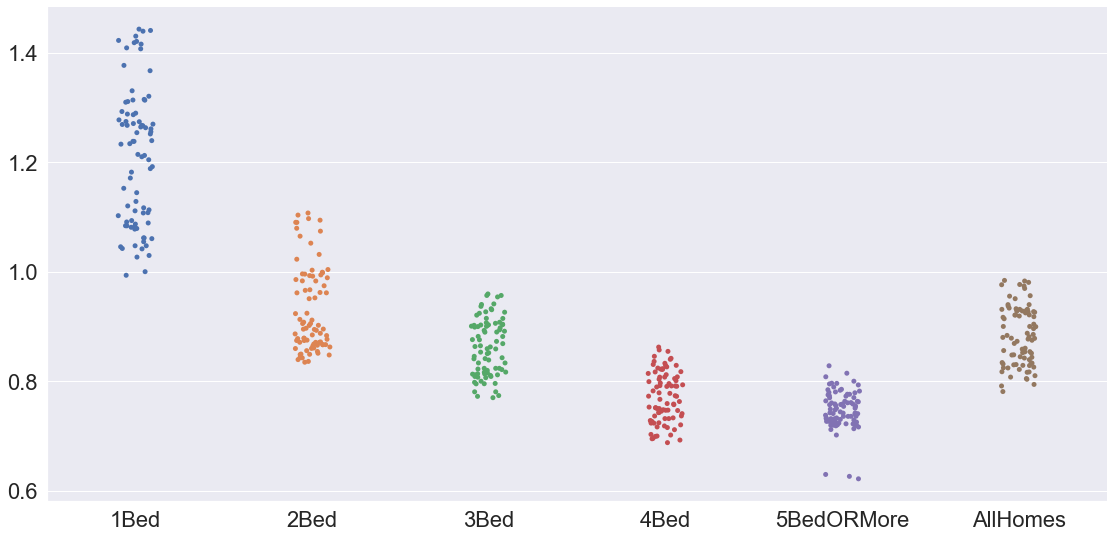

In [41]:
#Catplot
plt.figure(figsize=(8,6))
ax = sns.catplot(data= rent_persqft, height= 8, aspect=2)

### PctOfHomes

- PctOfHomesDecreasingInValues:	The percentage of homes in an given region with values that have decreased in the past year.
- PctOfHomesIncreasingInValues:	The percentage of homes in an given region with values that have increased in the past year.
- PctOfHomesSellingForGain:	The percentage of homes in an area that sold for a price higher than the previous sale price.
- PctOfHomesSellingForLoss:	The percentage of homes in an area that sold for a price lower than the previous sale price.

In [42]:
percentage= ['PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes']

In [387]:
percent_data_values= data.groupby('Date')[percentage[:2]].median().dropna()
fig = px.line(percent_data_values, width=800, height=400)


fig.update_layout(
    title="Time Vs Home_value Change",
    xaxis_title="Date",
    yaxis_title="Percentage",
    legend=dict(
    yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.4)
)
fig.show()

In [389]:
percent_data_gain_loss= data.groupby('Date')[percentage[2:]].median().dropna()

fig = px.line(percent_data_gain_loss, width=800, height=400)

fig.update_layout(
    title="Time Vs Gain/Loss in Homes",
    xaxis_title="Date",
    yaxis_title="Percentage",
    legend=dict(
    yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.4)
)
fig.show()

### Sale Counts

In [45]:
 sale_list= ['Sale_Counts', 'Sale_Counts_Seas_Adj', 'Sale_Prices']

In [390]:
sales= data.groupby('Date')[sale_list[:2]].median().dropna()
saleprice= data.groupby('Date')[sale_list[0:]].median().dropna()
#Comparing time-series of different types of houses over time
fig = px.line(sales,width=800, height=400 )

fig.update_layout(
    title="Sale Counts by Time",
    xaxis_title="Date",
    yaxis_title="Sale Counts",
    legend=dict(
    yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.4)
)

fig.show()



In [47]:
#Relation between Sale Count and Sales Prices
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=sales.index,y= sales.Sale_Counts_Seas_Adj, name="Sale_Counts_Seas_Adj"),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=saleprice.index,y= saleprice.Sale_Prices, name="Sale_Prices"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Sale Count and Sales Prices"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Sale_Counts_Seas_Adj", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Sale_Prices ", secondary_y=True)

fig.show()

# PricetoRent Ratio

- PriceToRentRatio:	This ratio is first calculated at the individual home level, where the estimated home value is divided by 12 times its estimated monthly rent price. The the median of all home-level price-to-rent ratios for a given region is then calculated.

In [393]:
pricetorent= data.groupby('Date')['PriceToRentRatio_AllHomes'].median().dropna()
#Comparing time-series of different types of houses over time
fig = px.line(pricetorent,width=800, height=400 )


fig.update_layout(
    title="Price to Rent Ratio by Time",
    xaxis_title="Date",
    yaxis_title="Price to Rent Ratio",
    legend=dict(
    yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.4)
)

fig.show()



### ZHVI

- ZHVI: A smoothed seasonally adjusted measure of the median estimated home value across a given region and housing type.

In [49]:
zhvi_list= ['ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom',
       'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes',
       'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier',
       'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier']

In [405]:
#ZHVI Plot
zhvi= data.groupby('Date')[zhvi_list].median().dropna()
zhvi= zhvi.iloc[:,:6]
zhvi.columns= types[:6]
#Comparing time-series of different types of houses over time
fig = px.line(zhvi, width=800, height=400)

fig.update_layout(
    title="ZHVI by Time",
    xaxis_title="Date",
    yaxis_title="ZHVI",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=1.01)
)

fig.show()

# plt.figure(figsize=(16,8))
# sns.lineplot(data= rent_persqft)

Text(0.5, 1.0, 'Housewise ZHVI')

<Figure size 576x432 with 0 Axes>

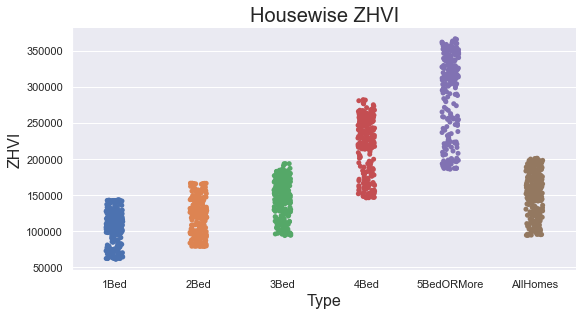

In [407]:
#Catplot
plt.figure(figsize=(8,6))
ax = sns.catplot(data= zhvi, height= 4, aspect=2)
#modify individual font size of elements
# plt.legend(title='Company', fontsize=20)
plt.xlabel('Type', fontsize=16);
plt.ylabel('ZHVI', fontsize=16);
plt.title('Housewise ZHVI', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=14)

In [426]:
zhvi_median= pd.DataFrame(zhvi.median())
zhvi_median.columns= ['ZHVI_Median']
zhvi_median

ZHVI_Median
1Bed           106550.0
2Bed           125000.0
3Bed           145600.0
4Bed           226400.0
5BedORMore     313850.0
AllHomes       156000.0

In [53]:
#Relation between PricetoRentRatio and ZHVI
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=pricetorent.index,y= pricetorent.values, name="PriceToRentRatio_AllHomes"),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=zhvi.index[zhvi.index>'2009-12-31'],y= zhvi.AllHomes, name="ZHVI_allhomes"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="PricetoRentRatio and ZHVI"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="PricetoRentRatio", secondary_y=False)
fig.update_yaxes(title_text="ZHVI", secondary_y=True)

fig.show()

## Plots by RegionName

In [415]:
#Expensive States by Real Estate in US
zhvi_region= data.groupby('RegionName')[['ZHVI_AllHomes']].median()
zhvi_region_top = zhvi_region.sort_values(by='ZHVI_AllHomes', ascending= False).head(10)
fig= px.bar(zhvi_region_top, x= zhvi_region_top.index, y=zhvi_region_top.ZHVI_AllHomes,width=800, height=400 )
fig.update_layout(title_text="Top US States by ZHVI", title_x=0.5)
fig.show()
# ax.set_xticklabels(zhvi_region_top.index, rotation=45)

In [417]:
#Cheapest Real Estate in US
zhvi_region_low = zhvi_region.sort_values(by='ZHVI_AllHomes', ascending= False).tail(10).dropna()
fig= px.bar(zhvi_region_low, x= zhvi_region_low.index, y=zhvi_region_low.ZHVI_AllHomes ,width=800, height=400 )
fig.update_layout(title_text="Bottom US States by ZHVI", title_x=0.5)
fig.show()

In [416]:
#Expensive Real Estate in Us
sale_region= data.groupby('RegionName')[['Sale_Prices']].median()
sale_region_top = sale_region.sort_values(by='Sale_Prices', ascending= False).head(10)
fig= px.bar(sale_region_top, x= sale_region_top.index, y=sale_region_top.Sale_Prices,width=800, height=400 )
fig.update_layout(title_text="Top US States by SalePrices", title_x=0.5)
fig.show()
# ax.set_xticklabels(zhvi_region_top.index, rotation=45)

### Choropleth Plot

In [57]:
us_states= {"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},
{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-131.602021,55.117982],[-131.569159,55.28229],[-131.355558,55.183705],[-131.38842,55.01392],[-131.645836,55.035827],[-131.602021,55.117982]]],[[[-131.832052,55.42469],[-131.645836,55.304197],[-131.749898,55.128935],[-131.832052,55.189182],[-131.832052,55.42469]]],[[[-132.976733,56.437924],[-132.735747,56.459832],[-132.631685,56.421493],[-132.664547,56.273616],[-132.878148,56.240754],[-133.069841,56.333862],[-132.976733,56.437924]]],[[[-133.595627,56.350293],[-133.162949,56.317431],[-133.05341,56.125739],[-132.620732,55.912138],[-132.472854,55.780691],[-132.4619,55.671152],[-132.357838,55.649245],[-132.341408,55.506844],[-132.166146,55.364444],[-132.144238,55.238474],[-132.029222,55.276813],[-131.97993,55.178228],[-131.958022,54.789365],[-132.029222,54.701734],[-132.308546,54.718165],[-132.385223,54.915335],[-132.483808,54.898904],[-132.686455,55.046781],[-132.746701,54.997489],[-132.916486,55.046781],[-132.889102,54.898904],[-132.73027,54.937242],[-132.626209,54.882473],[-132.675501,54.679826],[-132.867194,54.701734],[-133.157472,54.95915],[-133.239626,55.090597],[-133.223195,55.22752],[-133.453227,55.216566],[-133.453227,55.320628],[-133.277964,55.331582],[-133.102702,55.42469],[-133.17938,55.588998],[-133.387503,55.62186],[-133.420365,55.884753],[-133.497042,56.0162],[-133.639442,55.923092],[-133.694212,56.070969],[-133.546335,56.142169],[-133.666827,56.311955],[-133.595627,56.350293]]],[[[-133.738027,55.556137],[-133.546335,55.490413],[-133.414888,55.572568],[-133.283441,55.534229],[-133.420365,55.386352],[-133.633966,55.430167],[-133.738027,55.556137]]],[[[-133.907813,56.930849],[-134.050213,57.029434],[-133.885905,57.095157],[-133.343688,57.002049],[-133.102702,57.007526],[-132.932917,56.82131],[-132.620732,56.667956],[-132.653593,56.55294],[-132.817901,56.492694],[-133.042456,56.520078],[-133.201287,56.448878],[-133.420365,56.492694],[-133.66135,56.448878],[-133.710643,56.684386],[-133.688735,56.837741],[-133.869474,56.843218],[-133.907813,56.930849]]],[[[-134.115936,56.48174],[-134.25286,56.558417],[-134.400737,56.722725],[-134.417168,56.848695],[-134.296675,56.908941],[-134.170706,56.848695],[-134.143321,56.952757],[-133.748981,56.772017],[-133.710643,56.596755],[-133.847566,56.574848],[-133.935197,56.377678],[-133.836612,56.322908],[-133.957105,56.092877],[-134.110459,56.142169],[-134.132367,55.999769],[-134.230952,56.070969],[-134.291198,56.350293],[-134.115936,56.48174]]],[[[-134.636246,56.28457],[-134.669107,56.169554],[-134.806031,56.235277],[-135.178463,56.67891],[-135.413971,56.810356],[-135.331817,56.914418],[-135.424925,57.166357],[-135.687818,57.369004],[-135.419448,57.566174],[-135.298955,57.48402],[-135.063447,57.418296],[-134.849846,57.407343],[-134.844369,57.248511],[-134.636246,56.728202],[-134.636246,56.28457]]],[[[-134.712923,58.223407],[-134.373353,58.14673],[-134.176183,58.157683],[-134.187137,58.081006],[-133.902336,57.807159],[-134.099505,57.850975],[-134.148798,57.757867],[-133.935197,57.615466],[-133.869474,57.363527],[-134.083075,57.297804],[-134.154275,57.210173],[-134.499322,57.029434],[-134.603384,57.034911],[-134.6472,57.226604],[-134.575999,57.341619],[-134.608861,57.511404],[-134.729354,57.719528],[-134.707446,57.829067],[-134.784123,58.097437],[-134.91557,58.212453],[-134.953908,58.409623],[-134.712923,58.223407]]],[[[-135.857603,57.330665],[-135.715203,57.330665],[-135.567326,57.149926],[-135.633049,57.023957],[-135.857603,56.996572],[-135.824742,57.193742],[-135.857603,57.330665]]],[[[-136.279328,58.206976],[-135.978096,58.201499],[-135.780926,58.28913],[-135.496125,58.168637],[-135.64948,58.037191],[-135.59471,57.987898],[-135.45231,58.135776],[-135.107263,58.086483],[-134.91557,57.976944],[-135.025108,57.779775],[-134.937477,57.763344],[-134.822462,57.500451],[-135.085355,57.462112],[-135.572802,57.675713],[-135.556372,57.456635],[-135.709726,57.369004],[-135.890465,57.407343],[-136.000004,57.544266],[-136.208128,57.637374],[-136.366959,57.829067],[-136.569606,57.916698],[-136.558652,58.075529],[-136.421728,58.130299],[-136.377913,58.267222],[-136.279328,58.206976]]],[[[-147.079854,60.200582],[-147.501579,59.948643],[-147.53444,59.850058],[-147.874011,59.784335],[-147.80281,59.937689],[-147.435855,60.09652],[-147.205824,60.271782],[-147.079854,60.200582]]],[[[-147.561825,60.578491],[-147.616594,60.370367],[-147.758995,60.156767],[-147.956165,60.227967],[-147.791856,60.474429],[-147.561825,60.578491]]],[[[-147.786379,70.245291],[-147.682318,70.201475],[-147.162008,70.15766],[-146.888161,70.185044],[-146.510252,70.185044],[-146.099482,70.146706],[-145.858496,70.168614],[-145.622988,70.08646],[-145.195787,69.993352],[-144.620708,69.971444],[-144.461877,70.026213],[-144.078491,70.059075],[-143.914183,70.130275],[-143.497935,70.141229],[-143.503412,70.091936],[-143.25695,70.119321],[-142.747594,70.042644],[-142.402547,69.916674],[-142.079408,69.856428],[-142.008207,69.801659],[-141.712453,69.790705],[-141.433129,69.697597],[-141.378359,69.63735],[-141.208574,69.686643],[-141.00045,69.648304],[-141.00045,60.304644],[-140.53491,60.22249],[-140.474664,60.310121],[-139.987216,60.184151],[-139.696939,60.342983],[-139.088998,60.359413],[-139.198537,60.091043],[-139.045183,59.997935],[-138.700135,59.910304],[-138.623458,59.767904],[-137.604747,59.242118],[-137.445916,58.908024],[-137.265177,59.001132],[-136.827022,59.159963],[-136.580559,59.16544],[-136.465544,59.285933],[-136.476498,59.466672],[-136.301236,59.466672],[-136.25742,59.625503],[-135.945234,59.663842],[-135.479694,59.800766],[-135.025108,59.565257],[-135.068924,59.422857],[-134.959385,59.280456],[-134.701969,59.247595],[-134.378829,59.033994],[-134.400737,58.973748],[-134.25286,58.858732],[-133.842089,58.727285],[-133.173903,58.152206],[-133.075318,57.998852],[-132.867194,57.845498],[-132.560485,57.505928],[-132.253777,57.21565],[-132.368792,57.095157],[-132.05113,57.051341],[-132.127807,56.876079],[-131.870391,56.804879],[-131.837529,56.602232],[-131.580113,56.613186],[-131.087188,56.405062],[-130.78048,56.366724],[-130.621648,56.268139],[-130.468294,56.240754],[-130.424478,56.142169],[-130.101339,56.114785],[-130.002754,55.994292],[-130.150631,55.769737],[-130.128724,55.583521],[-129.986323,55.276813],[-130.095862,55.200136],[-130.336847,54.920812],[-130.687372,54.718165],[-130.785957,54.822227],[-130.917403,54.789365],[-131.010511,54.997489],[-130.983126,55.08512],[-131.092665,55.189182],[-130.862634,55.298721],[-130.928357,55.337059],[-131.158389,55.200136],[-131.284358,55.287767],[-131.426759,55.238474],[-131.843006,55.457552],[-131.700606,55.698537],[-131.963499,55.616383],[-131.974453,55.49589],[-132.182576,55.588998],[-132.226392,55.704014],[-132.083991,55.829984],[-132.127807,55.955953],[-132.324977,55.851892],[-132.522147,56.076446],[-132.642639,56.032631],[-132.719317,56.218847],[-132.527624,56.339339],[-132.341408,56.339339],[-132.396177,56.487217],[-132.297592,56.67891],[-132.450946,56.673433],[-132.768609,56.837741],[-132.993164,57.034911],[-133.51895,57.177311],[-133.507996,57.577128],[-133.677781,57.62642],[-133.639442,57.790728],[-133.814705,57.834544],[-134.072121,58.053622],[-134.143321,58.168637],[-134.586953,58.206976],[-135.074401,58.502731],[-135.282525,59.192825],[-135.38111,59.033994],[-135.337294,58.891593],[-135.140124,58.617746],[-135.189417,58.573931],[-135.05797,58.349376],[-135.085355,58.201499],[-135.277048,58.234361],[-135.430402,58.398669],[-135.633049,58.426053],[-135.91785,58.382238],[-135.912373,58.617746],[-136.087635,58.814916],[-136.246466,58.75467],[-136.876314,58.962794],[-136.931084,58.902547],[-136.586036,58.836824],[-136.317666,58.672516],[-136.213604,58.667039],[-136.180743,58.535592],[-136.043819,58.382238],[-136.388867,58.294607],[-136.591513,58.349376],[-136.59699,58.212453],[-136.859883,58.316515],[-136.947514,58.393192],[-137.111823,58.393192],[-137.566409,58.590362],[-137.900502,58.765624],[-137.933364,58.869686],[-138.11958,59.02304],[-138.634412,59.132579],[-138.919213,59.247595],[-139.417615,59.379041],[-139.746231,59.505011],[-139.718846,59.641934],[-139.625738,59.598119],[-139.5162,59.68575],[-139.625738,59.88292],[-139.488815,59.992458],[-139.554538,60.041751],[-139.801,59.833627],[-140.315833,59.696704],[-140.92925,59.745996],[-141.444083,59.871966],[-141.46599,59.970551],[-141.706976,59.948643],[-141.964392,60.019843],[-142.539471,60.085566],[-142.873564,60.091043],[-143.623905,60.036274],[-143.892275,59.997935],[-144.231845,60.140336],[-144.65357,60.206059],[-144.785016,60.29369],[-144.834309,60.441568],[-145.124586,60.430614],[-145.223171,60.299167],[-145.738004,60.474429],[-145.820158,60.551106],[-146.351421,60.408706],[-146.608837,60.238921],[-146.718376,60.397752],[-146.608837,60.485383],[-146.455483,60.463475],[-145.951604,60.578491],[-146.017328,60.666122],[-146.252836,60.622307],[-146.345944,60.737322],[-146.565022,60.753753],[-146.784099,61.044031],[-146.866253,60.972831],[-147.172962,60.934492],[-147.271547,60.972831],[-147.375609,60.879723],[-147.758995,60.912584],[-147.775426,60.808523],[-148.032842,60.781138],[-148.153334,60.819476],[-148.065703,61.005692],[-148.175242,61.000215],[-148.350504,60.803046],[-148.109519,60.737322],[-148.087611,60.594922],[-147.939734,60.441568],[-148.027365,60.277259],[-148.219058,60.332029],[-148.273827,60.249875],[-148.087611,60.217013],[-147.983549,59.997935],[-148.251919,59.95412],[-148.399797,59.997935],[-148.635305,59.937689],[-148.755798,59.986981],[-149.067984,59.981505],[-149.05703,60.063659],[-149.204907,60.008889],[-149.287061,59.904827],[-149.418508,59.997935],[-149.582816,59.866489],[-149.511616,59.806242],[-149.741647,59.729565],[-149.949771,59.718611],[-150.031925,59.61455],[-150.25648,59.521442],[-150.409834,59.554303],[-150.579619,59.444764],[-150.716543,59.450241],[-151.001343,59.225687],[-151.308052,59.209256],[-151.406637,59.280456],[-151.592853,59.159963],[-151.976239,59.253071],[-151.888608,59.422857],[-151.636669,59.483103],[-151.47236,59.472149],[-151.423068,59.537872],[-151.127313,59.669319],[-151.116359,59.778858],[-151.505222,59.63098],[-151.828361,59.718611],[-151.8667,59.778858],[-151.702392,60.030797],[-151.423068,60.211536],[-151.379252,60.359413],[-151.297098,60.386798],[-151.264237,60.545629],[-151.406637,60.720892],[-151.06159,60.786615],[-150.404357,61.038554],[-150.245526,60.939969],[-150.042879,60.912584],[-149.741647,61.016646],[-150.075741,61.15357],[-150.207187,61.257632],[-150.47008,61.246678],[-150.656296,61.29597],[-150.711066,61.252155],[-151.023251,61.180954],[-151.165652,61.044031],[-151.477837,61.011169],[-151.800977,60.852338],[-151.833838,60.748276],[-152.080301,60.693507],[-152.13507,60.578491],[-152.310332,60.507291],[-152.392486,60.304644],[-152.732057,60.173197],[-152.567748,60.069136],[-152.704672,59.915781],[-153.022334,59.888397],[-153.049719,59.691227],[-153.345474,59.620026],[-153.438582,59.702181],[-153.586459,59.548826],[-153.761721,59.543349],[-153.72886,59.433811],[-154.117723,59.368087],[-154.1944,59.066856],[-153.750768,59.050425],[-153.400243,58.968271],[-153.301658,58.869686],[-153.444059,58.710854],[-153.679567,58.612269],[-153.898645,58.606793],[-153.920553,58.519161],[-154.062953,58.4863],[-153.99723,58.376761],[-154.145107,58.212453],[-154.46277,58.059098],[-154.643509,58.059098],[-154.818771,58.004329],[-154.988556,58.015283],[-155.120003,57.955037],[-155.081664,57.872883],[-155.328126,57.829067],[-155.377419,57.708574],[-155.547204,57.785251],[-155.73342,57.549743],[-156.045606,57.566174],[-156.023698,57.440204],[-156.209914,57.473066],[-156.34136,57.418296],[-156.34136,57.248511],[-156.549484,56.985618],[-156.883577,56.952757],[-157.157424,56.832264],[-157.20124,56.766541],[-157.376502,56.859649],[-157.672257,56.607709],[-157.754411,56.67891],[-157.918719,56.657002],[-157.957058,56.514601],[-158.126843,56.459832],[-158.32949,56.48174],[-158.488321,56.339339],[-158.208997,56.295524],[-158.510229,55.977861],[-159.375585,55.873799],[-159.616571,55.594475],[-159.676817,55.654722],[-159.643955,55.829984],[-159.813741,55.857368],[-160.027341,55.791645],[-160.060203,55.720445],[-160.394296,55.605429],[-160.536697,55.473983],[-160.580512,55.567091],[-160.668143,55.457552],[-160.865313,55.528752],[-161.232268,55.358967],[-161.506115,55.364444],[-161.467776,55.49589],[-161.588269,55.62186],[-161.697808,55.517798],[-161.686854,55.408259],[-162.053809,55.074166],[-162.179779,55.15632],[-162.218117,55.03035],[-162.470057,55.052258],[-162.508395,55.249428],[-162.661749,55.293244],[-162.716519,55.222043],[-162.579595,55.134412],[-162.645319,54.997489],[-162.847965,54.926289],[-163.00132,55.079643],[-163.187536,55.090597],[-163.220397,55.03035],[-163.034181,54.942719],[-163.373752,54.800319],[-163.14372,54.76198],[-163.138243,54.696257],[-163.329936,54.74555],[-163.587352,54.614103],[-164.085754,54.61958],[-164.332216,54.531949],[-164.354124,54.466226],[-164.638925,54.389548],[-164.847049,54.416933],[-164.918249,54.603149],[-164.710125,54.663395],[-164.551294,54.88795],[-164.34317,54.893427],[-163.894061,55.041304],[-163.532583,55.046781],[-163.39566,54.904381],[-163.291598,55.008443],[-163.313505,55.128935],[-163.105382,55.183705],[-162.880827,55.183705],[-162.579595,55.446598],[-162.245502,55.682106],[-161.807347,55.89023],[-161.292514,55.983338],[-161.078914,55.939523],[-160.87079,55.999769],[-160.816021,55.912138],[-160.931036,55.813553],[-160.805067,55.736876],[-160.766728,55.857368],[-160.509312,55.868322],[-160.438112,55.791645],[-160.27928,55.76426],[-160.273803,55.857368],[-160.536697,55.939523],[-160.558604,55.994292],[-160.383342,56.251708],[-160.147834,56.399586],[-159.830171,56.541986],[-159.326293,56.667956],[-158.959338,56.848695],[-158.784076,56.782971],[-158.641675,56.810356],[-158.701922,56.925372],[-158.658106,57.034911],[-158.378782,57.264942],[-157.995396,57.41282],[-157.688688,57.609989],[-157.705118,57.719528],[-157.458656,58.497254],[-157.07527,58.705377],[-157.119086,58.869686],[-158.039212,58.634177],[-158.32949,58.661562],[-158.40069,58.760147],[-158.564998,58.803962],[-158.619768,58.913501],[-158.767645,58.864209],[-158.860753,58.694424],[-158.701922,58.480823],[-158.893615,58.387715],[-159.0634,58.420577],[-159.392016,58.760147],[-159.616571,58.929932],[-159.731586,58.929932],[-159.808264,58.803962],[-159.906848,58.782055],[-160.054726,58.886116],[-160.235465,58.902547],[-160.317619,59.072332],[-160.854359,58.88064],[-161.33633,58.743716],[-161.374669,58.667039],[-161.752577,58.552023],[-161.938793,58.656085],[-161.769008,58.776578],[-161.829255,59.061379],[-161.955224,59.36261],[-161.703285,59.48858],[-161.911409,59.740519],[-162.092148,59.88292],[-162.234548,60.091043],[-162.448149,60.178674],[-162.502918,59.997935],[-162.760334,59.959597],[-163.171105,59.844581],[-163.66403,59.795289],[-163.9324,59.806242],[-164.162431,59.866489],[-164.189816,60.02532],[-164.386986,60.074613],[-164.699171,60.29369],[-164.962064,60.337506],[-165.268773,60.578491],[-165.060649,60.68803],[-165.016834,60.890677],[-165.175665,60.846861],[-165.197573,60.972831],[-165.120896,61.076893],[-165.323543,61.170001],[-165.34545,61.071416],[-165.591913,61.109754],[-165.624774,61.279539],[-165.816467,61.301447],[-165.920529,61.416463],[-165.915052,61.558863],[-166.106745,61.49314],[-166.139607,61.630064],[-165.904098,61.662925],[-166.095791,61.81628],[-165.756221,61.827233],[-165.756221,62.013449],[-165.674067,62.139419],[-165.044219,62.539236],[-164.912772,62.659728],[-164.819664,62.637821],[-164.874433,62.807606],[-164.633448,63.097884],[-164.425324,63.212899],[-164.036462,63.262192],[-163.73523,63.212899],[-163.313505,63.037637],[-163.039658,63.059545],[-162.661749,63.22933],[-162.272887,63.486746],[-162.075717,63.514131],[-162.026424,63.448408],[-161.555408,63.448408],[-161.13916,63.503177],[-160.766728,63.771547],[-160.766728,63.837271],[-160.952944,64.08921],[-160.974852,64.237087],[-161.26513,64.395918],[-161.374669,64.532842],[-161.078914,64.494503],[-160.79959,64.609519],[-160.783159,64.719058],[-161.144637,64.921705],[-161.413007,64.762873],[-161.664946,64.790258],[-161.900455,64.702627],[-162.168825,64.680719],[-162.234548,64.620473],[-162.541257,64.532842],[-162.634365,64.384965],[-162.787719,64.324718],[-162.858919,64.49998],[-163.045135,64.538319],[-163.176582,64.401395],[-163.253259,64.467119],[-163.598306,64.565704],[-164.304832,64.560227],[-164.80871,64.450688],[-165.000403,64.434257],[-165.411174,64.49998],[-166.188899,64.576658],[-166.391546,64.636904],[-166.484654,64.735489],[-166.413454,64.872412],[-166.692778,64.987428],[-166.638008,65.113398],[-166.462746,65.179121],[-166.517516,65.337952],[-166.796839,65.337952],[-167.026871,65.381768],[-167.47598,65.414629],[-167.711489,65.496784],[-168.072967,65.578938],[-168.105828,65.682999],[-167.541703,65.819923],[-166.829701,66.049954],[-166.3313,66.186878],[-166.046499,66.110201],[-165.756221,66.09377],[-165.690498,66.203309],[-165.86576,66.21974],[-165.88219,66.312848],[-165.186619,66.466202],[-164.403417,66.581218],[-163.981692,66.592172],[-163.751661,66.553833],[-163.872153,66.389525],[-163.828338,66.274509],[-163.915969,66.192355],[-163.768091,66.060908],[-163.494244,66.082816],[-163.149197,66.060908],[-162.749381,66.088293],[-162.634365,66.039001],[-162.371472,66.028047],[-162.14144,66.077339],[-161.840208,66.02257],[-161.549931,66.241647],[-161.341807,66.252601],[-161.199406,66.208786],[-161.128206,66.334755],[-161.528023,66.395002],[-161.911409,66.345709],[-161.87307,66.510017],[-162.174302,66.68528],[-162.502918,66.740049],[-162.601503,66.89888],[-162.344087,66.937219],[-162.015471,66.778388],[-162.075717,66.652418],[-161.916886,66.553833],[-161.571838,66.438817],[-161.489684,66.55931],[-161.884024,66.718141],[-161.714239,67.002942],[-161.851162,67.052235],[-162.240025,66.991988],[-162.639842,67.008419],[-162.700088,67.057712],[-162.902735,67.008419],[-163.740707,67.128912],[-163.757138,67.254881],[-164.009077,67.534205],[-164.211724,67.638267],[-164.534863,67.725898],[-165.192096,67.966884],[-165.493328,68.059992],[-165.794559,68.081899],[-166.243668,68.246208],[-166.681824,68.339316],[-166.703731,68.372177],[-166.375115,68.42147],[-166.227238,68.574824],[-166.216284,68.881533],[-165.329019,68.859625],[-164.255539,68.930825],[-163.976215,68.985595],[-163.532583,69.138949],[-163.110859,69.374457],[-163.023228,69.609966],[-162.842489,69.812613],[-162.470057,69.982398],[-162.311225,70.108367],[-161.851162,70.311014],[-161.779962,70.256245],[-161.396576,70.239814],[-160.837928,70.343876],[-160.487404,70.453415],[-159.649432,70.792985],[-159.33177,70.809416],[-159.298908,70.760123],[-158.975769,70.798462],[-158.658106,70.787508],[-158.033735,70.831323],[-157.420318,70.979201],[-156.812377,71.285909],[-156.565915,71.351633],[-156.522099,71.296863],[-155.585543,71.170894],[-155.508865,71.083263],[-155.832005,70.968247],[-155.979882,70.96277],[-155.974405,70.809416],[-155.503388,70.858708],[-155.476004,70.940862],[-155.262403,71.017539],[-155.191203,70.973724],[-155.032372,71.148986],[-154.566832,70.990155],[-154.643509,70.869662],[-154.353231,70.8368],[-154.183446,70.7656],[-153.931507,70.880616],[-153.487874,70.886093],[-153.235935,70.924431],[-152.589656,70.886093],[-152.26104,70.842277],[-152.419871,70.606769],[-151.817408,70.546523],[-151.773592,70.486276],[-151.187559,70.382214],[-151.182082,70.431507],[-150.760358,70.49723],[-150.355064,70.491753],[-150.349588,70.436984],[-150.114079,70.431507],[-149.867617,70.508184],[-149.462323,70.519138],[-149.177522,70.486276],[-148.78866,70.404122],[-148.607921,70.420553],[-148.350504,70.305537],[-148.202627,70.349353],[-147.961642,70.316491],[-147.786379,70.245291]]],[[[-152.94018,58.026237],[-152.945657,57.982421],[-153.290705,58.048145],[-153.044242,58.305561],[-152.819688,58.327469],[-152.666333,58.562977],[-152.496548,58.354853],[-152.354148,58.426053],[-152.080301,58.311038],[-152.080301,58.152206],[-152.480117,58.130299],[-152.655379,58.059098],[-152.94018,58.026237]]],[[[-153.958891,57.538789],[-153.67409,57.670236],[-153.931507,57.69762],[-153.936983,57.812636],[-153.723383,57.889313],[-153.570028,57.834544],[-153.548121,57.719528],[-153.46049,57.796205],[-153.455013,57.96599],[-153.268797,57.889313],[-153.235935,57.998852],[-153.071627,57.933129],[-152.874457,57.933129],[-152.721103,57.993375],[-152.469163,57.889313],[-152.469163,57.599035],[-152.151501,57.620943],[-152.359625,57.42925],[-152.74301,57.505928],[-152.60061,57.379958],[-152.710149,57.275896],[-152.907319,57.325188],[-152.912796,57.128019],[-153.214027,57.073249],[-153.312612,56.991095],[-153.498828,57.067772],[-153.695998,56.859649],[-153.849352,56.837741],[-154.013661,56.744633],[-154.073907,56.969187],[-154.303938,56.848695],[-154.314892,56.919895],[-154.523016,56.991095],[-154.539447,57.193742],[-154.742094,57.275896],[-154.627078,57.511404],[-154.227261,57.659282],[-153.980799,57.648328],[-153.958891,57.538789]]],[[[-154.53397,56.602232],[-154.742094,56.399586],[-154.807817,56.432447],[-154.53397,56.602232]]],[[[-155.634835,55.923092],[-155.476004,55.912138],[-155.530773,55.704014],[-155.793666,55.731399],[-155.837482,55.802599],[-155.634835,55.923092]]],[[[-159.890418,55.28229],[-159.950664,55.068689],[-160.257373,54.893427],[-160.109495,55.161797],[-160.005433,55.134412],[-159.890418,55.28229]]],[[[-160.520266,55.358967],[-160.33405,55.358967],[-160.339527,55.249428],[-160.525743,55.128935],[-160.690051,55.211089],[-160.794113,55.134412],[-160.854359,55.320628],[-160.79959,55.380875],[-160.520266,55.358967]]],[[[-162.256456,54.981058],[-162.234548,54.893427],[-162.349564,54.838658],[-162.437195,54.931766],[-162.256456,54.981058]]],[[[-162.415287,63.634624],[-162.563165,63.536039],[-162.612457,63.62367],[-162.415287,63.634624]]],[[[-162.80415,54.488133],[-162.590549,54.449795],[-162.612457,54.367641],[-162.782242,54.373118],[-162.80415,54.488133]]],[[[-165.548097,54.29644],[-165.476897,54.181425],[-165.630251,54.132132],[-165.685021,54.252625],[-165.548097,54.29644]]],[[[-165.73979,54.15404],[-166.046499,54.044501],[-166.112222,54.121178],[-165.980775,54.219763],[-165.73979,54.15404]]],[[[-166.364161,60.359413],[-166.13413,60.397752],[-166.084837,60.326552],[-165.88219,60.342983],[-165.685021,60.277259],[-165.646682,59.992458],[-165.750744,59.89935],[-166.00816,59.844581],[-166.062929,59.745996],[-166.440838,59.855535],[-166.6161,59.850058],[-166.994009,59.992458],[-167.125456,59.992458],[-167.344534,60.074613],[-167.421211,60.206059],[-167.311672,60.238921],[-166.93924,60.206059],[-166.763978,60.310121],[-166.577762,60.321075],[-166.495608,60.392275],[-166.364161,60.359413]]],[[[-166.375115,54.01164],[-166.210807,53.934962],[-166.5449,53.748746],[-166.539423,53.715885],[-166.117699,53.852808],[-166.112222,53.776131],[-166.282007,53.683023],[-166.555854,53.622777],[-166.583239,53.529669],[-166.878994,53.431084],[-167.13641,53.425607],[-167.306195,53.332499],[-167.623857,53.250345],[-167.793643,53.337976],[-167.459549,53.442038],[-167.355487,53.425607],[-167.103548,53.513238],[-167.163794,53.611823],[-167.021394,53.715885],[-166.807793,53.666592],[-166.785886,53.732316],[-167.015917,53.754223],[-167.141887,53.825424],[-167.032348,53.945916],[-166.643485,54.017116],[-166.561331,53.880193],[-166.375115,54.01164]]],[[[-168.790446,53.157237],[-168.40706,53.34893],[-168.385152,53.431084],[-168.237275,53.524192],[-168.007243,53.568007],[-167.886751,53.518715],[-167.842935,53.387268],[-168.270136,53.244868],[-168.500168,53.036744],[-168.686384,52.965544],[-168.790446,53.157237]]],[[[-169.74891,52.894344],[-169.705095,52.795759],[-169.962511,52.790282],[-169.989896,52.856005],[-169.74891,52.894344]]],[[[-170.148727,57.221127],[-170.28565,57.128019],[-170.313035,57.221127],[-170.148727,57.221127]]],[[[-170.669036,52.697174],[-170.603313,52.604066],[-170.789529,52.538343],[-170.816914,52.636928],[-170.669036,52.697174]]],[[[-171.742517,63.716778],[-170.94836,63.5689],[-170.488297,63.69487],[-170.280174,63.683916],[-170.093958,63.612716],[-170.044665,63.492223],[-169.644848,63.4265],[-169.518879,63.366254],[-168.99857,63.338869],[-168.686384,63.295053],[-168.856169,63.147176],[-169.108108,63.180038],[-169.376478,63.152653],[-169.513402,63.08693],[-169.639372,62.939052],[-169.831064,63.075976],[-170.055619,63.169084],[-170.263743,63.180038],[-170.362328,63.2841],[-170.866206,63.415546],[-171.101715,63.421023],[-171.463193,63.306007],[-171.73704,63.366254],[-171.852055,63.486746],[-171.742517,63.716778]]],[[[-172.432611,52.390465],[-172.41618,52.275449],[-172.607873,52.253542],[-172.569535,52.352127],[-172.432611,52.390465]]],[[[-173.626584,52.14948],[-173.495138,52.105664],[-173.122706,52.111141],[-173.106275,52.07828],[-173.549907,52.028987],[-173.626584,52.14948]]],[[[-174.322156,52.280926],[-174.327632,52.379511],[-174.185232,52.41785],[-173.982585,52.319265],[-174.059262,52.226157],[-174.179755,52.231634],[-174.141417,52.127572],[-174.333109,52.116618],[-174.738403,52.007079],[-174.968435,52.039941],[-174.902711,52.116618],[-174.656249,52.105664],[-174.322156,52.280926]]],[[[-176.469116,51.853725],[-176.288377,51.870156],[-176.288377,51.744186],[-176.518409,51.760617],[-176.80321,51.61274],[-176.912748,51.80991],[-176.792256,51.815386],[-176.775825,51.963264],[-176.627947,51.968741],[-176.627947,51.859202],[-176.469116,51.853725]]],[[[-177.153734,51.946833],[-177.044195,51.897541],[-177.120872,51.727755],[-177.274226,51.678463],[-177.279703,51.782525],[-177.153734,51.946833]]],[[[-178.123152,51.919448],[-177.953367,51.913971],[-177.800013,51.793479],[-177.964321,51.651078],[-178.123152,51.919448]]],[[[173.107557,52.992929],[173.293773,52.927205],[173.304726,52.823143],[172.90491,52.762897],[172.642017,52.927205],[172.642017,53.003883],[173.107557,52.992929]]]]}},
{"type":"Feature","id":"AZ","properties":{"name":"Arizona"},"geometry":{"type":"Polygon","coordinates":[[[-109.042503,37.000263],[-109.04798,31.331629],[-111.074448,31.331629],[-112.246513,31.704061],[-114.815198,32.492741],[-114.72209,32.717295],[-114.524921,32.755634],[-114.470151,32.843265],[-114.524921,33.029481],[-114.661844,33.034958],[-114.727567,33.40739],[-114.524921,33.54979],[-114.497536,33.697668],[-114.535874,33.933176],[-114.415382,34.108438],[-114.256551,34.174162],[-114.136058,34.305608],[-114.333228,34.448009],[-114.470151,34.710902],[-114.634459,34.87521],[-114.634459,35.00118],[-114.574213,35.138103],[-114.596121,35.324319],[-114.678275,35.516012],[-114.738521,36.102045],[-114.371566,36.140383],[-114.251074,36.01989],[-114.152489,36.025367],[-114.048427,36.195153],[-114.048427,37.000263],[-110.499369,37.00574],[-109.042503,37.000263]]]}},
{"type":"Feature","id":"AR","properties":{"name":"Arkansas"},"geometry":{"type":"Polygon","coordinates":[[[-94.473842,36.501861],[-90.152536,36.496384],[-90.064905,36.304691],[-90.218259,36.184199],[-90.377091,35.997983],[-89.730812,35.997983],[-89.763673,35.811767],[-89.911551,35.756997],[-89.944412,35.603643],[-90.130628,35.439335],[-90.114197,35.198349],[-90.212782,35.023087],[-90.311367,34.995703],[-90.251121,34.908072],[-90.409952,34.831394],[-90.481152,34.661609],[-90.585214,34.617794],[-90.568783,34.420624],[-90.749522,34.365854],[-90.744046,34.300131],[-90.952169,34.135823],[-90.891923,34.026284],[-91.072662,33.867453],[-91.231493,33.560744],[-91.056231,33.429298],[-91.143862,33.347144],[-91.089093,33.13902],[-91.16577,33.002096],[-93.608485,33.018527],[-94.041164,33.018527],[-94.041164,33.54979],[-94.183564,33.593606],[-94.380734,33.544313],[-94.484796,33.637421],[-94.430026,35.395519],[-94.616242,36.501861],[-94.473842,36.501861]]]}},
{"type":"Feature","id":"CA","properties":{"name":"California"},"geometry":{"type":"Polygon","coordinates":[[[-123.233256,42.006186],[-122.378853,42.011663],[-121.037003,41.995232],[-120.001861,41.995232],[-119.996384,40.264519],[-120.001861,38.999346],[-118.71478,38.101128],[-117.498899,37.21934],[-116.540435,36.501861],[-115.85034,35.970598],[-114.634459,35.00118],[-114.634459,34.87521],[-114.470151,34.710902],[-114.333228,34.448009],[-114.136058,34.305608],[-114.256551,34.174162],[-114.415382,34.108438],[-114.535874,33.933176],[-114.497536,33.697668],[-114.524921,33.54979],[-114.727567,33.40739],[-114.661844,33.034958],[-114.524921,33.029481],[-114.470151,32.843265],[-114.524921,32.755634],[-114.72209,32.717295],[-116.04751,32.624187],[-117.126467,32.536556],[-117.24696,32.668003],[-117.252437,32.876127],[-117.329114,33.122589],[-117.471515,33.297851],[-117.7837,33.538836],[-118.183517,33.763391],[-118.260194,33.703145],[-118.413548,33.741483],[-118.391641,33.840068],[-118.566903,34.042715],[-118.802411,33.998899],[-119.218659,34.146777],[-119.278905,34.26727],[-119.558229,34.415147],[-119.875891,34.40967],[-120.138784,34.475393],[-120.472878,34.448009],[-120.64814,34.579455],[-120.609801,34.858779],[-120.670048,34.902595],[-120.631709,35.099764],[-120.894602,35.247642],[-120.905556,35.450289],[-121.004141,35.461243],[-121.168449,35.636505],[-121.283465,35.674843],[-121.332757,35.784382],[-121.716143,36.195153],[-121.896882,36.315645],[-121.935221,36.638785],[-121.858544,36.6114],[-121.787344,36.803093],[-121.929744,36.978355],[-122.105006,36.956447],[-122.335038,37.115279],[-122.417192,37.241248],[-122.400761,37.361741],[-122.515777,37.520572],[-122.515777,37.783465],[-122.329561,37.783465],[-122.406238,38.15042],[-122.488392,38.112082],[-122.504823,37.931343],[-122.701993,37.893004],[-122.937501,38.029928],[-122.97584,38.265436],[-123.129194,38.451652],[-123.331841,38.566668],[-123.44138,38.698114],[-123.737134,38.95553],[-123.687842,39.032208],[-123.824765,39.366301],[-123.764519,39.552517],[-123.85215,39.831841],[-124.109566,40.105688],[-124.361506,40.259042],[-124.410798,40.439781],[-124.158859,40.877937],[-124.109566,41.025814],[-124.158859,41.14083],[-124.065751,41.442061],[-124.147905,41.715908],[-124.257444,41.781632],[-124.213628,42.000709],[-123.233256,42.006186]]]}},
{"type":"Feature","id":"CO","properties":{"name":"Colorado"},"geometry":{"type":"Polygon","coordinates":[[[-107.919731,41.003906],[-105.728954,40.998429],[-104.053011,41.003906],[-102.053927,41.003906],[-102.053927,40.001626],[-102.042974,36.994786],[-103.001438,37.000263],[-104.337812,36.994786],[-106.868158,36.994786],[-107.421329,37.000263],[-109.042503,37.000263],[-109.042503,38.166851],[-109.058934,38.27639],[-109.053457,39.125316],[-109.04798,40.998429],[-107.919731,41.003906]]]}},
{"type":"Feature","id":"CT","properties":{"name":"Connecticut"},"geometry":{"type":"Polygon","coordinates":[[[-73.053528,42.039048],[-71.799309,42.022617],[-71.799309,42.006186],[-71.799309,41.414677],[-71.859555,41.321569],[-71.947186,41.338],[-72.385341,41.261322],[-72.905651,41.28323],[-73.130205,41.146307],[-73.371191,41.102491],[-73.655992,40.987475],[-73.727192,41.102491],[-73.48073,41.21203],[-73.55193,41.294184],[-73.486206,42.050002],[-73.053528,42.039048]]]}},
{"type":"Feature","id":"DE","properties":{"name":"Delaware"},"geometry":{"type":"Polygon","coordinates":[[[-75.414089,39.804456],[-75.507197,39.683964],[-75.611259,39.61824],[-75.589352,39.459409],[-75.441474,39.311532],[-75.403136,39.065069],[-75.189535,38.807653],[-75.09095,38.796699],[-75.047134,38.451652],[-75.693413,38.462606],[-75.786521,39.722302],[-75.616736,39.831841],[-75.414089,39.804456]]]}},
{"type":"Feature","id":"FL","properties":{"name":"Florida"},"geometry":{"type":"Polygon","coordinates":[[[-85.497137,30.997536],[-85.004212,31.003013],[-84.867289,30.712735],[-83.498053,30.647012],[-82.216449,30.570335],[-82.167157,30.356734],[-82.046664,30.362211],[-82.002849,30.564858],[-82.041187,30.751074],[-81.948079,30.827751],[-81.718048,30.745597],[-81.444201,30.707258],[-81.383954,30.27458],[-81.257985,29.787132],[-80.967707,29.14633],[-80.524075,28.461713],[-80.589798,28.41242],[-80.56789,28.094758],[-80.381674,27.738757],[-80.091397,27.021277],[-80.03115,26.796723],[-80.036627,26.566691],[-80.146166,25.739673],[-80.239274,25.723243],[-80.337859,25.465826],[-80.304997,25.383672],[-80.49669,25.197456],[-80.573367,25.241272],[-80.759583,25.164595],[-81.077246,25.120779],[-81.170354,25.224841],[-81.126538,25.378195],[-81.351093,25.821827],[-81.526355,25.903982],[-81.679709,25.843735],[-81.800202,26.090198],[-81.833064,26.292844],[-82.041187,26.517399],[-82.09048,26.665276],[-82.057618,26.878877],[-82.172634,26.917216],[-82.145249,26.791246],[-82.249311,26.758384],[-82.566974,27.300601],[-82.692943,27.437525],[-82.391711,27.837342],[-82.588881,27.815434],[-82.720328,27.689464],[-82.851774,27.886634],[-82.676512,28.434328],[-82.643651,28.888914],[-82.764143,28.998453],[-82.802482,29.14633],[-82.994175,29.179192],[-83.218729,29.420177],[-83.399469,29.518762],[-83.410422,29.66664],[-83.536392,29.721409],[-83.640454,29.885717],[-84.02384,30.104795],[-84.357933,30.055502],[-84.341502,29.902148],[-84.451041,29.929533],[-84.867289,29.743317],[-85.310921,29.699501],[-85.299967,29.80904],[-85.404029,29.940487],[-85.924338,30.236241],[-86.29677,30.362211],[-86.630863,30.395073],[-86.910187,30.373165],[-87.518128,30.280057],[-87.37025,30.427934],[-87.446927,30.510088],[-87.408589,30.674397],[-87.633143,30.86609],[-87.600282,30.997536],[-85.497137,30.997536]]]}},
{"type":"Feature","id":"GA","properties":{"name":"Georgia"},"geometry":{"type":"Polygon","coordinates":[[[-83.109191,35.00118],[-83.322791,34.787579],[-83.339222,34.683517],[-83.005129,34.469916],[-82.901067,34.486347],[-82.747713,34.26727],[-82.714851,34.152254],[-82.55602,33.94413],[-82.325988,33.81816],[-82.194542,33.631944],[-81.926172,33.462159],[-81.937125,33.347144],[-81.761863,33.160928],[-81.493493,33.007573],[-81.42777,32.843265],[-81.416816,32.629664],[-81.279893,32.558464],[-81.121061,32.290094],[-81.115584,32.120309],[-80.885553,32.032678],[-81.132015,31.693108],[-81.175831,31.517845],[-81.279893,31.364491],[-81.290846,31.20566],[-81.400385,31.13446],[-81.444201,30.707258],[-81.718048,30.745597],[-81.948079,30.827751],[-82.041187,30.751074],[-82.002849,30.564858],[-82.046664,30.362211],[-82.167157,30.356734],[-82.216449,30.570335],[-83.498053,30.647012],[-84.867289,30.712735],[-85.004212,31.003013],[-85.113751,31.27686],[-85.042551,31.539753],[-85.141136,31.840985],[-85.053504,32.01077],[-85.058981,32.13674],[-84.889196,32.262709],[-85.004212,32.322956],[-84.960397,32.421541],[-85.069935,32.580372],[-85.184951,32.859696],[-85.431413,34.124869],[-85.606675,34.984749],[-84.319594,34.990226],[-83.618546,34.984749],[-83.109191,35.00118]]]}},
{"type":"Feature","id":"HI","properties":{"name":"Hawaii"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-155.634835,18.948267],[-155.881297,19.035898],[-155.919636,19.123529],[-155.886774,19.348084],[-156.062036,19.73147],[-155.925113,19.857439],[-155.826528,20.032702],[-155.897728,20.147717],[-155.87582,20.26821],[-155.596496,20.12581],[-155.284311,20.021748],[-155.092618,19.868393],[-155.092618,19.736947],[-154.807817,19.523346],[-154.983079,19.348084],[-155.295265,19.26593],[-155.514342,19.134483],[-155.634835,18.948267]]],[[[-156.587823,21.029505],[-156.472807,20.892581],[-156.324929,20.952827],[-156.00179,20.793996],[-156.051082,20.651596],[-156.379699,20.580396],[-156.445422,20.60778],[-156.461853,20.783042],[-156.631638,20.821381],[-156.697361,20.919966],[-156.587823,21.029505]]],[[[-156.982162,21.210244],[-157.080747,21.106182],[-157.310779,21.106182],[-157.239579,21.221198],[-156.982162,21.210244]]],[[[-157.951581,21.697691],[-157.842042,21.462183],[-157.896811,21.325259],[-158.110412,21.303352],[-158.252813,21.582676],[-158.126843,21.588153],[-157.951581,21.697691]]],[[[-159.468693,22.228955],[-159.353678,22.218001],[-159.298908,22.113939],[-159.33177,21.966061],[-159.446786,21.872953],[-159.764448,21.987969],[-159.726109,22.152277],[-159.468693,22.228955]]]]}},
{"type":"Feature","id":"ID","properties":{"name":"Idaho"},"geometry":{"type":"Polygon","coordinates":[[[-116.04751,49.000239],[-116.04751,47.976051],[-115.724371,47.696727],[-115.718894,47.42288],[-115.527201,47.302388],[-115.324554,47.258572],[-115.302646,47.187372],[-114.930214,46.919002],[-114.886399,46.809463],[-114.623506,46.705401],[-114.612552,46.639678],[-114.322274,46.645155],[-114.464674,46.272723],[-114.492059,46.037214],[-114.387997,45.88386],[-114.568736,45.774321],[-114.497536,45.670259],[-114.546828,45.560721],[-114.333228,45.456659],[-114.086765,45.593582],[-113.98818,45.703121],[-113.807441,45.604536],[-113.834826,45.522382],[-113.736241,45.330689],[-113.571933,45.128042],[-113.45144,45.056842],[-113.456917,44.865149],[-113.341901,44.782995],[-113.133778,44.772041],[-113.002331,44.448902],[-112.887315,44.394132],[-112.783254,44.48724],[-112.471068,44.481763],[-112.241036,44.569394],[-112.104113,44.520102],[-111.868605,44.563917],[-111.819312,44.509148],[-111.616665,44.547487],[-111.386634,44.75561],[-111.227803,44.580348],[-111.047063,44.476286],[-111.047063,42.000709],[-112.164359,41.995232],[-114.04295,41.995232],[-117.027882,42.000709],[-117.027882,43.830007],[-116.896436,44.158624],[-116.97859,44.240778],[-117.170283,44.257209],[-117.241483,44.394132],[-117.038836,44.750133],[-116.934774,44.782995],[-116.830713,44.930872],[-116.847143,45.02398],[-116.732128,45.144473],[-116.671881,45.319735],[-116.463758,45.61549],[-116.545912,45.752413],[-116.78142,45.823614],[-116.918344,45.993399],[-116.92382,46.168661],[-117.055267,46.343923],[-117.038836,46.426077],[-117.044313,47.762451],[-117.033359,49.000239],[-116.04751,49.000239]]]}},
{"type":"Feature","id":"IL","properties":{"name":"Illinois"},"geometry":{"type":"Polygon","coordinates":[[[-90.639984,42.510065],[-88.788778,42.493634],[-87.802929,42.493634],[-87.83579,42.301941],[-87.682436,42.077386],[-87.523605,41.710431],[-87.529082,39.34987],[-87.63862,39.169131],[-87.512651,38.95553],[-87.49622,38.780268],[-87.62219,38.637868],[-87.655051,38.506421],[-87.83579,38.292821],[-87.950806,38.27639],[-87.923421,38.15042],[-88.000098,38.101128],[-88.060345,37.865619],[-88.027483,37.799896],[-88.15893,37.657496],[-88.065822,37.482234],[-88.476592,37.389126],[-88.514931,37.285064],[-88.421823,37.153617],[-88.547792,37.071463],[-88.914747,37.224817],[-89.029763,37.213863],[-89.183118,37.038601],[-89.133825,36.983832],[-89.292656,36.994786],[-89.517211,37.279587],[-89.435057,37.34531],[-89.517211,37.537003],[-89.517211,37.690357],[-89.84035,37.903958],[-89.949889,37.88205],[-90.059428,38.013497],[-90.355183,38.216144],[-90.349706,38.374975],[-90.179921,38.632391],[-90.207305,38.725499],[-90.10872,38.845992],[-90.251121,38.917192],[-90.470199,38.961007],[-90.585214,38.867899],[-90.661891,38.928146],[-90.727615,39.256762],[-91.061708,39.470363],[-91.368417,39.727779],[-91.494386,40.034488],[-91.50534,40.237135],[-91.417709,40.379535],[-91.401278,40.560274],[-91.121954,40.669813],[-91.09457,40.823167],[-90.963123,40.921752],[-90.946692,41.097014],[-91.111001,41.239415],[-91.045277,41.414677],[-90.656414,41.463969],[-90.344229,41.589939],[-90.311367,41.743293],[-90.179921,41.809016],[-90.141582,42.000709],[-90.168967,42.126679],[-90.393521,42.225264],[-90.420906,42.329326],[-90.639984,42.510065]]]}},
{"type":"Feature","id":"IN","properties":{"name":"Indiana"},"geometry":{"type":"Polygon","coordinates":[[[-85.990061,41.759724],[-84.807042,41.759724],[-84.807042,41.694001],[-84.801565,40.500028],[-84.817996,39.103408],[-84.894673,39.059592],[-84.812519,38.785745],[-84.987781,38.780268],[-85.173997,38.68716],[-85.431413,38.730976],[-85.42046,38.533806],[-85.590245,38.451652],[-85.655968,38.325682],[-85.83123,38.27639],[-85.924338,38.024451],[-86.039354,37.958727],[-86.263908,38.051835],[-86.302247,38.166851],[-86.521325,38.040881],[-86.504894,37.931343],[-86.729448,37.893004],[-86.795172,37.991589],[-87.047111,37.893004],[-87.129265,37.788942],[-87.381204,37.93682],[-87.512651,37.903958],[-87.600282,37.975158],[-87.682436,37.903958],[-87.934375,37.893004],[-88.027483,37.799896],[-88.060345,37.865619],[-88.000098,38.101128],[-87.923421,38.15042],[-87.950806,38.27639],[-87.83579,38.292821],[-87.655051,38.506421],[-87.62219,38.637868],[-87.49622,38.780268],[-87.512651,38.95553],[-87.63862,39.169131],[-87.529082,39.34987],[-87.523605,41.710431],[-87.42502,41.644708],[-87.118311,41.644708],[-86.822556,41.759724],[-85.990061,41.759724]]]}},
{"type":"Feature","id":"IA","properties":{"name":"Iowa"},"geometry":{"type":"Polygon","coordinates":[[[-91.368417,43.501391],[-91.215062,43.501391],[-91.204109,43.353514],[-91.056231,43.254929],[-91.176724,43.134436],[-91.143862,42.909881],[-91.067185,42.75105],[-90.711184,42.636034],[-90.639984,42.510065],[-90.420906,42.329326],[-90.393521,42.225264],[-90.168967,42.126679],[-90.141582,42.000709],[-90.179921,41.809016],[-90.311367,41.743293],[-90.344229,41.589939],[-90.656414,41.463969],[-91.045277,41.414677],[-91.111001,41.239415],[-90.946692,41.097014],[-90.963123,40.921752],[-91.09457,40.823167],[-91.121954,40.669813],[-91.401278,40.560274],[-91.417709,40.379535],[-91.527248,40.412397],[-91.729895,40.615043],[-91.833957,40.609566],[-93.257961,40.582182],[-94.632673,40.571228],[-95.7664,40.587659],[-95.881416,40.719105],[-95.826646,40.976521],[-95.925231,41.201076],[-95.919754,41.453015],[-96.095016,41.540646],[-96.122401,41.67757],[-96.062155,41.798063],[-96.127878,41.973325],[-96.264801,42.039048],[-96.44554,42.488157],[-96.631756,42.707235],[-96.544125,42.855112],[-96.511264,43.052282],[-96.434587,43.123482],[-96.560556,43.222067],[-96.527695,43.397329],[-96.582464,43.479483],[-96.451017,43.501391],[-91.368417,43.501391]]]}},
{"type":"Feature","id":"KS","properties":{"name":"Kansas"},"geometry":{"type":"Polygon","coordinates":[[[-101.90605,40.001626],[-95.306337,40.001626],[-95.207752,39.908518],[-94.884612,39.831841],[-95.109167,39.541563],[-94.983197,39.442978],[-94.824366,39.20747],[-94.610765,39.158177],[-94.616242,37.000263],[-100.087706,37.000263],[-102.042974,36.994786],[-102.053927,40.001626],[-101.90605,40.001626]]]}},
{"type":"Feature","id":"KY","properties":{"name":"Kentucky"},"geometry":{"type":"Polygon","coordinates":[[[-83.903347,38.769315],[-83.678792,38.632391],[-83.519961,38.703591],[-83.142052,38.626914],[-83.032514,38.725499],[-82.890113,38.758361],[-82.846298,38.588575],[-82.731282,38.561191],[-82.594358,38.424267],[-82.621743,38.123036],[-82.50125,37.931343],[-82.342419,37.783465],[-82.293127,37.668449],[-82.101434,37.553434],[-81.969987,37.537003],[-82.353373,37.268633],[-82.720328,37.120755],[-82.720328,37.044078],[-82.868205,36.978355],[-82.879159,36.890724],[-83.070852,36.852385],[-83.136575,36.742847],[-83.673316,36.600446],[-83.689746,36.584015],[-84.544149,36.594969],[-85.289013,36.627831],[-85.486183,36.616877],[-86.592525,36.655216],[-87.852221,36.633308],[-88.071299,36.677123],[-88.054868,36.496384],[-89.298133,36.507338],[-89.418626,36.496384],[-89.363857,36.622354],[-89.215979,36.578538],[-89.133825,36.983832],[-89.183118,37.038601],[-89.029763,37.213863],[-88.914747,37.224817],[-88.547792,37.071463],[-88.421823,37.153617],[-88.514931,37.285064],[-88.476592,37.389126],[-88.065822,37.482234],[-88.15893,37.657496],[-88.027483,37.799896],[-87.934375,37.893004],[-87.682436,37.903958],[-87.600282,37.975158],[-87.512651,37.903958],[-87.381204,37.93682],[-87.129265,37.788942],[-87.047111,37.893004],[-86.795172,37.991589],[-86.729448,37.893004],[-86.504894,37.931343],[-86.521325,38.040881],[-86.302247,38.166851],[-86.263908,38.051835],[-86.039354,37.958727],[-85.924338,38.024451],[-85.83123,38.27639],[-85.655968,38.325682],[-85.590245,38.451652],[-85.42046,38.533806],[-85.431413,38.730976],[-85.173997,38.68716],[-84.987781,38.780268],[-84.812519,38.785745],[-84.894673,39.059592],[-84.817996,39.103408],[-84.43461,39.103408],[-84.231963,38.895284],[-84.215533,38.807653],[-83.903347,38.769315]]]}},
{"type":"Feature","id":"LA","properties":{"name":"Louisiana"},"geometry":{"type":"Polygon","coordinates":[[[-93.608485,33.018527],[-91.16577,33.002096],[-91.072662,32.887081],[-91.143862,32.843265],[-91.154816,32.640618],[-91.006939,32.514649],[-90.985031,32.218894],[-91.105524,31.988862],[-91.341032,31.846462],[-91.401278,31.621907],[-91.499863,31.643815],[-91.516294,31.27686],[-91.636787,31.265906],[-91.565587,31.068736],[-91.636787,30.997536],[-89.747242,30.997536],[-89.845827,30.66892],[-89.681519,30.449842],[-89.643181,30.285534],[-89.522688,30.181472],[-89.818443,30.044549],[-89.84035,29.945964],[-89.599365,29.88024],[-89.495303,30.039072],[-89.287179,29.88024],[-89.30361,29.754271],[-89.424103,29.699501],[-89.648657,29.748794],[-89.621273,29.655686],[-89.69795,29.513285],[-89.506257,29.387316],[-89.199548,29.348977],[-89.09001,29.2011],[-89.002379,29.179192],[-89.16121,29.009407],[-89.336472,29.042268],[-89.484349,29.217531],[-89.851304,29.310638],[-89.851304,29.480424],[-90.032043,29.425654],[-90.021089,29.283254],[-90.103244,29.151807],[-90.23469,29.129899],[-90.333275,29.277777],[-90.563307,29.283254],[-90.645461,29.129899],[-90.798815,29.086084],[-90.963123,29.179192],[-91.09457,29.190146],[-91.220539,29.436608],[-91.445094,29.546147],[-91.532725,29.529716],[-91.620356,29.73784],[-91.883249,29.710455],[-91.888726,29.836425],[-92.146142,29.715932],[-92.113281,29.622824],[-92.31045,29.535193],[-92.617159,29.579009],[-92.97316,29.715932],[-93.2251,29.776178],[-93.767317,29.726886],[-93.838517,29.688547],[-93.926148,29.787132],[-93.690639,30.143133],[-93.767317,30.334826],[-93.696116,30.438888],[-93.728978,30.575812],[-93.630393,30.679874],[-93.526331,30.93729],[-93.542762,31.15089],[-93.816609,31.556184],[-93.822086,31.775262],[-94.041164,31.994339],[-94.041164,33.018527],[-93.608485,33.018527]]]}},
{"type":"Feature","id":"ME","properties":{"name":"Maine"},"geometry":{"type":"Polygon","coordinates":[[[-70.703921,43.057759],[-70.824413,43.128959],[-70.807983,43.227544],[-70.966814,43.34256],[-71.032537,44.657025],[-71.08183,45.303304],[-70.649151,45.440228],[-70.720352,45.511428],[-70.556043,45.664782],[-70.386258,45.735983],[-70.41912,45.796229],[-70.260289,45.889337],[-70.309581,46.064599],[-70.210996,46.327492],[-70.057642,46.415123],[-69.997395,46.694447],[-69.225147,47.461219],[-69.044408,47.428357],[-69.033454,47.242141],[-68.902007,47.176418],[-68.578868,47.285957],[-68.376221,47.285957],[-68.233821,47.357157],[-67.954497,47.198326],[-67.790188,47.066879],[-67.779235,45.944106],[-67.801142,45.675736],[-67.456095,45.604536],[-67.505388,45.48952],[-67.417757,45.379982],[-67.488957,45.281397],[-67.346556,45.128042],[-67.16034,45.160904],[-66.979601,44.804903],[-67.187725,44.646072],[-67.308218,44.706318],[-67.406803,44.596779],[-67.549203,44.624164],[-67.565634,44.531056],[-67.75185,44.54201],[-68.047605,44.328409],[-68.118805,44.476286],[-68.222867,44.48724],[-68.173574,44.328409],[-68.403606,44.251732],[-68.458375,44.377701],[-68.567914,44.311978],[-68.82533,44.311978],[-68.830807,44.459856],[-68.984161,44.426994],[-68.956777,44.322932],[-69.099177,44.103854],[-69.071793,44.043608],[-69.258008,43.923115],[-69.444224,43.966931],[-69.553763,43.840961],[-69.707118,43.82453],[-69.833087,43.720469],[-69.986442,43.742376],[-70.030257,43.851915],[-70.254812,43.676653],[-70.194565,43.567114],[-70.358873,43.528776],[-70.369827,43.435668],[-70.556043,43.320652],[-70.703921,43.057759]]]}},
{"type":"Feature","id":"MD","properties":{"name":"Maryland"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-75.994645,37.95325],[-76.016553,37.95325],[-76.043938,37.95325],[-75.994645,37.95325]]],[[[-79.477979,39.722302],[-75.786521,39.722302],[-75.693413,38.462606],[-75.047134,38.451652],[-75.244304,38.029928],[-75.397659,38.013497],[-75.671506,37.95325],[-75.885106,37.909435],[-75.879629,38.073743],[-75.961783,38.139466],[-75.846768,38.210667],[-76.000122,38.374975],[-76.049415,38.303775],[-76.257538,38.320205],[-76.328738,38.500944],[-76.263015,38.500944],[-76.257538,38.736453],[-76.191815,38.829561],[-76.279446,39.147223],[-76.169907,39.333439],[-76.000122,39.366301],[-75.972737,39.557994],[-76.098707,39.536086],[-76.104184,39.437501],[-76.367077,39.311532],[-76.443754,39.196516],[-76.460185,38.906238],[-76.55877,38.769315],[-76.514954,38.539283],[-76.383508,38.380452],[-76.399939,38.259959],[-76.317785,38.139466],[-76.3616,38.057312],[-76.591632,38.216144],[-76.920248,38.292821],[-77.018833,38.446175],[-77.205049,38.358544],[-77.276249,38.479037],[-77.128372,38.632391],[-77.040741,38.791222],[-76.909294,38.895284],[-77.035264,38.993869],[-77.117418,38.933623],[-77.248864,39.026731],[-77.456988,39.076023],[-77.456988,39.223901],[-77.566527,39.306055],[-77.719881,39.322485],[-77.834897,39.601809],[-78.004682,39.601809],[-78.174467,39.694917],[-78.267575,39.61824],[-78.431884,39.623717],[-78.470222,39.514178],[-78.765977,39.585379],[-78.963147,39.437501],[-79.094593,39.470363],[-79.291763,39.300578],[-79.488933,39.20747],[-79.477979,39.722302]]]]}},
{"type":"Feature","id":"MA","properties":{"name":"Massachusetts"},"geometry":{"type":"Polygon","coordinates":[[[-70.917521,42.887974],[-70.818936,42.871543],[-70.780598,42.696281],[-70.824413,42.55388],[-70.983245,42.422434],[-70.988722,42.269079],[-70.769644,42.247172],[-70.638197,42.08834],[-70.660105,41.962371],[-70.550566,41.929509],[-70.539613,41.814493],[-70.260289,41.715908],[-69.937149,41.809016],[-70.008349,41.672093],[-70.484843,41.5516],[-70.660105,41.546123],[-70.764167,41.639231],[-70.928475,41.611847],[-70.933952,41.540646],[-71.120168,41.496831],[-71.196845,41.67757],[-71.22423,41.710431],[-71.328292,41.781632],[-71.383061,42.01714],[-71.530939,42.01714],[-71.799309,42.006186],[-71.799309,42.022617],[-73.053528,42.039048],[-73.486206,42.050002],[-73.508114,42.08834],[-73.267129,42.745573],[-72.456542,42.729142],[-71.29543,42.696281],[-71.185891,42.789389],[-70.917521,42.887974]]]}},
{"type":"Feature","id":"MI","properties":{"name":"Michigan"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-83.454238,41.732339],[-84.807042,41.694001],[-84.807042,41.759724],[-85.990061,41.759724],[-86.822556,41.759724],[-86.619909,41.891171],[-86.482986,42.115725],[-86.357016,42.252649],[-86.263908,42.444341],[-86.209139,42.718189],[-86.231047,43.013943],[-86.526801,43.594499],[-86.433693,43.813577],[-86.499417,44.07647],[-86.269385,44.34484],[-86.220093,44.569394],[-86.252954,44.689887],[-86.088646,44.73918],[-86.066738,44.903488],[-85.809322,44.947303],[-85.612152,45.128042],[-85.628583,44.766564],[-85.524521,44.750133],[-85.393075,44.930872],[-85.387598,45.237581],[-85.305444,45.314258],[-85.031597,45.363551],[-85.119228,45.577151],[-84.938489,45.75789],[-84.713934,45.768844],[-84.461995,45.653829],[-84.215533,45.637398],[-84.09504,45.494997],[-83.908824,45.484043],[-83.596638,45.352597],[-83.4871,45.358074],[-83.317314,45.144473],[-83.454238,45.029457],[-83.322791,44.88158],[-83.273499,44.711795],[-83.333745,44.339363],[-83.536392,44.246255],[-83.585684,44.054562],[-83.82667,43.988839],[-83.958116,43.758807],[-83.908824,43.671176],[-83.667839,43.589022],[-83.481623,43.714992],[-83.262545,43.972408],[-82.917498,44.070993],[-82.747713,43.994316],[-82.643651,43.851915],[-82.539589,43.435668],[-82.523158,43.227544],[-82.413619,42.975605],[-82.517681,42.614127],[-82.681989,42.559357],[-82.687466,42.690804],[-82.797005,42.652465],[-82.922975,42.351234],[-83.125621,42.236218],[-83.185868,42.006186],[-83.437807,41.814493],[-83.454238,41.732339]]],[[[-85.508091,45.730506],[-85.49166,45.610013],[-85.623106,45.588105],[-85.568337,45.75789],[-85.508091,45.730506]]],[[[-87.589328,45.095181],[-87.742682,45.199243],[-87.649574,45.341643],[-87.885083,45.363551],[-87.791975,45.500474],[-87.781021,45.675736],[-87.989145,45.796229],[-88.10416,45.922199],[-88.531362,46.020784],[-88.662808,45.987922],[-89.09001,46.135799],[-90.119674,46.338446],[-90.229213,46.508231],[-90.415429,46.568478],[-90.026566,46.672539],[-89.851304,46.793032],[-89.413149,46.842325],[-89.128348,46.990202],[-88.996902,46.995679],[-88.887363,47.099741],[-88.575177,47.247618],[-88.416346,47.373588],[-88.180837,47.455742],[-87.956283,47.384542],[-88.350623,47.077833],[-88.443731,46.973771],[-88.438254,46.787555],[-88.246561,46.929956],[-87.901513,46.908048],[-87.633143,46.809463],[-87.392158,46.535616],[-87.260711,46.486323],[-87.008772,46.530139],[-86.948526,46.469893],[-86.696587,46.437031],[-86.159846,46.667063],[-85.880522,46.68897],[-85.508091,46.678016],[-85.256151,46.754694],[-85.064458,46.760171],[-85.02612,46.480847],[-84.82895,46.442508],[-84.63178,46.486323],[-84.549626,46.4206],[-84.418179,46.502754],[-84.127902,46.530139],[-84.122425,46.179615],[-83.990978,46.031737],[-83.793808,45.993399],[-83.7719,46.091984],[-83.580208,46.091984],[-83.476146,45.987922],[-83.563777,45.911245],[-84.111471,45.976968],[-84.374364,45.933153],[-84.659165,46.053645],[-84.741319,45.944106],[-84.70298,45.850998],[-84.82895,45.872906],[-85.015166,46.00983],[-85.338305,46.091984],[-85.502614,46.097461],[-85.661445,45.966014],[-85.924338,45.933153],[-86.209139,45.960537],[-86.324155,45.905768],[-86.351539,45.796229],[-86.663725,45.703121],[-86.647294,45.834568],[-86.784218,45.861952],[-86.838987,45.725029],[-87.069019,45.719552],[-87.17308,45.659305],[-87.326435,45.423797],[-87.611236,45.122565],[-87.589328,45.095181]]],[[[-88.805209,47.976051],[-89.057148,47.850082],[-89.188594,47.833651],[-89.177641,47.937713],[-88.547792,48.173221],[-88.668285,48.008913],[-88.805209,47.976051]]]]}},
{"type":"Feature","id":"MN","properties":{"name":"Minnesota"},"geometry":{"type":"Polygon","coordinates":[[[-92.014696,46.705401],[-92.091373,46.749217],[-92.29402,46.667063],[-92.29402,46.075553],[-92.354266,46.015307],[-92.639067,45.933153],[-92.869098,45.719552],[-92.885529,45.577151],[-92.770513,45.566198],[-92.644544,45.440228],[-92.75956,45.286874],[-92.737652,45.117088],[-92.808852,44.750133],[-92.545959,44.569394],[-92.337835,44.552964],[-92.233773,44.443425],[-91.927065,44.333886],[-91.877772,44.202439],[-91.592971,44.032654],[-91.43414,43.994316],[-91.242447,43.775238],[-91.269832,43.616407],[-91.215062,43.501391],[-91.368417,43.501391],[-96.451017,43.501391],[-96.451017,45.297827],[-96.681049,45.412843],[-96.856311,45.604536],[-96.582464,45.818137],[-96.560556,45.933153],[-96.598895,46.332969],[-96.719387,46.437031],[-96.801542,46.656109],[-96.785111,46.924479],[-96.823449,46.968294],[-96.856311,47.609096],[-97.053481,47.948667],[-97.130158,48.140359],[-97.16302,48.545653],[-97.097296,48.682577],[-97.228743,49.000239],[-95.152983,49.000239],[-95.152983,49.383625],[-94.955813,49.372671],[-94.824366,49.295994],[-94.69292,48.775685],[-94.588858,48.715438],[-94.260241,48.699007],[-94.221903,48.649715],[-93.838517,48.627807],[-93.794701,48.518268],[-93.466085,48.545653],[-93.466085,48.589469],[-93.208669,48.644238],[-92.984114,48.62233],[-92.726698,48.540176],[-92.655498,48.436114],[-92.50762,48.447068],[-92.370697,48.222514],[-92.304974,48.315622],[-92.053034,48.359437],[-92.009219,48.266329],[-91.713464,48.200606],[-91.713464,48.112975],[-91.565587,48.041775],[-91.264355,48.080113],[-91.083616,48.178698],[-90.837154,48.238944],[-90.749522,48.091067],[-90.579737,48.123929],[-90.377091,48.091067],[-90.141582,48.112975],[-89.873212,47.987005],[-89.615796,48.008913],[-89.637704,47.954144],[-89.971797,47.828174],[-90.437337,47.729589],[-90.738569,47.625527],[-91.171247,47.368111],[-91.357463,47.20928],[-91.642264,47.028541],[-92.091373,46.787555],[-92.014696,46.705401]]]}},
{"type":"Feature","id":"MS","properties":{"name":"Mississippi"},"geometry":{"type":"Polygon","coordinates":[[[-88.471115,34.995703],[-88.202745,34.995703],[-88.098683,34.891641],[-88.241084,33.796253],[-88.471115,31.895754],[-88.394438,30.367688],[-88.503977,30.323872],[-88.744962,30.34578],[-88.843547,30.411504],[-89.084533,30.367688],[-89.418626,30.252672],[-89.522688,30.181472],[-89.643181,30.285534],[-89.681519,30.449842],[-89.845827,30.66892],[-89.747242,30.997536],[-91.636787,30.997536],[-91.565587,31.068736],[-91.636787,31.265906],[-91.516294,31.27686],[-91.499863,31.643815],[-91.401278,31.621907],[-91.341032,31.846462],[-91.105524,31.988862],[-90.985031,32.218894],[-91.006939,32.514649],[-91.154816,32.640618],[-91.143862,32.843265],[-91.072662,32.887081],[-91.16577,33.002096],[-91.089093,33.13902],[-91.143862,33.347144],[-91.056231,33.429298],[-91.231493,33.560744],[-91.072662,33.867453],[-90.891923,34.026284],[-90.952169,34.135823],[-90.744046,34.300131],[-90.749522,34.365854],[-90.568783,34.420624],[-90.585214,34.617794],[-90.481152,34.661609],[-90.409952,34.831394],[-90.251121,34.908072],[-90.311367,34.995703],[-88.471115,34.995703]]]}},
{"type":"Feature","id":"MO","properties":{"name":"Missouri"},"geometry":{"type":"Polygon","coordinates":[[[-91.833957,40.609566],[-91.729895,40.615043],[-91.527248,40.412397],[-91.417709,40.379535],[-91.50534,40.237135],[-91.494386,40.034488],[-91.368417,39.727779],[-91.061708,39.470363],[-90.727615,39.256762],[-90.661891,38.928146],[-90.585214,38.867899],[-90.470199,38.961007],[-90.251121,38.917192],[-90.10872,38.845992],[-90.207305,38.725499],[-90.179921,38.632391],[-90.349706,38.374975],[-90.355183,38.216144],[-90.059428,38.013497],[-89.949889,37.88205],[-89.84035,37.903958],[-89.517211,37.690357],[-89.517211,37.537003],[-89.435057,37.34531],[-89.517211,37.279587],[-89.292656,36.994786],[-89.133825,36.983832],[-89.215979,36.578538],[-89.363857,36.622354],[-89.418626,36.496384],[-89.484349,36.496384],[-89.539119,36.496384],[-89.533642,36.249922],[-89.730812,35.997983],[-90.377091,35.997983],[-90.218259,36.184199],[-90.064905,36.304691],[-90.152536,36.496384],[-94.473842,36.501861],[-94.616242,36.501861],[-94.616242,37.000263],[-94.610765,39.158177],[-94.824366,39.20747],[-94.983197,39.442978],[-95.109167,39.541563],[-94.884612,39.831841],[-95.207752,39.908518],[-95.306337,40.001626],[-95.552799,40.264519],[-95.7664,40.587659],[-94.632673,40.571228],[-93.257961,40.582182],[-91.833957,40.609566]]]}},
{"type":"Feature","id":"MT","properties":{"name":"Montana"},"geometry":{"type":"Polygon","coordinates":[[[-104.047534,49.000239],[-104.042057,47.861036],[-104.047534,45.944106],[-104.042057,44.996596],[-104.058488,44.996596],[-105.91517,45.002073],[-109.080842,45.002073],[-111.05254,45.002073],[-111.047063,44.476286],[-111.227803,44.580348],[-111.386634,44.75561],[-111.616665,44.547487],[-111.819312,44.509148],[-111.868605,44.563917],[-112.104113,44.520102],[-112.241036,44.569394],[-112.471068,44.481763],[-112.783254,44.48724],[-112.887315,44.394132],[-113.002331,44.448902],[-113.133778,44.772041],[-113.341901,44.782995],[-113.456917,44.865149],[-113.45144,45.056842],[-113.571933,45.128042],[-113.736241,45.330689],[-113.834826,45.522382],[-113.807441,45.604536],[-113.98818,45.703121],[-114.086765,45.593582],[-114.333228,45.456659],[-114.546828,45.560721],[-114.497536,45.670259],[-114.568736,45.774321],[-114.387997,45.88386],[-114.492059,46.037214],[-114.464674,46.272723],[-114.322274,46.645155],[-114.612552,46.639678],[-114.623506,46.705401],[-114.886399,46.809463],[-114.930214,46.919002],[-115.302646,47.187372],[-115.324554,47.258572],[-115.527201,47.302388],[-115.718894,47.42288],[-115.724371,47.696727],[-116.04751,47.976051],[-116.04751,49.000239],[-111.50165,48.994762],[-109.453274,49.000239],[-104.047534,49.000239]]]}},
{"type":"Feature","id":"NE","properties":{"name":"Nebraska"},"geometry":{"type":"Polygon","coordinates":[[[-103.324578,43.002989],[-101.626726,42.997512],[-98.499393,42.997512],[-98.466531,42.94822],[-97.951699,42.767481],[-97.831206,42.866066],[-97.688806,42.844158],[-97.217789,42.844158],[-96.692003,42.657942],[-96.626279,42.515542],[-96.44554,42.488157],[-96.264801,42.039048],[-96.127878,41.973325],[-96.062155,41.798063],[-96.122401,41.67757],[-96.095016,41.540646],[-95.919754,41.453015],[-95.925231,41.201076],[-95.826646,40.976521],[-95.881416,40.719105],[-95.7664,40.587659],[-95.552799,40.264519],[-95.306337,40.001626],[-101.90605,40.001626],[-102.053927,40.001626],[-102.053927,41.003906],[-104.053011,41.003906],[-104.053011,43.002989],[-103.324578,43.002989]]]}},
{"type":"Feature","id":"NV","properties":{"name":"Nevada"},"geometry":{"type":"Polygon","coordinates":[[[-117.027882,42.000709],[-114.04295,41.995232],[-114.048427,37.000263],[-114.048427,36.195153],[-114.152489,36.025367],[-114.251074,36.01989],[-114.371566,36.140383],[-114.738521,36.102045],[-114.678275,35.516012],[-114.596121,35.324319],[-114.574213,35.138103],[-114.634459,35.00118],[-115.85034,35.970598],[-116.540435,36.501861],[-117.498899,37.21934],[-118.71478,38.101128],[-120.001861,38.999346],[-119.996384,40.264519],[-120.001861,41.995232],[-118.698349,41.989755],[-117.027882,42.000709]]]}},
{"type":"Feature","id":"NH","properties":{"name":"New Hampshire"},"geometry":{"type":"Polygon","coordinates":[[[-71.08183,45.303304],[-71.032537,44.657025],[-70.966814,43.34256],[-70.807983,43.227544],[-70.824413,43.128959],[-70.703921,43.057759],[-70.818936,42.871543],[-70.917521,42.887974],[-71.185891,42.789389],[-71.29543,42.696281],[-72.456542,42.729142],[-72.544173,42.80582],[-72.533219,42.953697],[-72.445588,43.008466],[-72.456542,43.150867],[-72.379864,43.572591],[-72.204602,43.769761],[-72.116971,43.994316],[-72.02934,44.07647],[-72.034817,44.322932],[-71.700724,44.41604],[-71.536416,44.585825],[-71.629524,44.750133],[-71.4926,44.914442],[-71.503554,45.013027],[-71.361154,45.270443],[-71.131122,45.243058],[-71.08183,45.303304]]]}},
{"type":"Feature","id":"NJ","properties":{"name":"New Jersey"},"geometry":{"type":"Polygon","coordinates":[[[-74.236547,41.14083],[-73.902454,40.998429],[-74.022947,40.708151],[-74.187255,40.642428],[-74.274886,40.489074],[-74.001039,40.412397],[-73.979131,40.297381],[-74.099624,39.760641],[-74.411809,39.360824],[-74.614456,39.245808],[-74.795195,38.993869],[-74.888303,39.158177],[-75.178581,39.240331],[-75.534582,39.459409],[-75.55649,39.607286],[-75.561967,39.629194],[-75.507197,39.683964],[-75.414089,39.804456],[-75.145719,39.88661],[-75.129289,39.963288],[-74.82258,40.127596],[-74.773287,40.215227],[-75.058088,40.417874],[-75.069042,40.543843],[-75.195012,40.576705],[-75.205966,40.691721],[-75.052611,40.866983],[-75.134765,40.971045],[-74.882826,41.179168],[-74.828057,41.288707],[-74.69661,41.359907],[-74.236547,41.14083]]]}},
{"type":"Feature","id":"NM","properties":{"name":"New Mexico"},"geometry":{"type":"Polygon","coordinates":[[[-107.421329,37.000263],[-106.868158,36.994786],[-104.337812,36.994786],[-103.001438,37.000263],[-103.001438,36.501861],[-103.039777,36.501861],[-103.045254,34.01533],[-103.067161,33.002096],[-103.067161,31.999816],[-106.616219,31.999816],[-106.643603,31.901231],[-106.528588,31.786216],[-108.210008,31.786216],[-108.210008,31.331629],[-109.04798,31.331629],[-109.042503,37.000263],[-107.421329,37.000263]]]}},
{"type":"Feature","id":"NY","properties":{"name":"New York"},"geometry":{"type":"Polygon","coordinates":[[[-73.343806,45.013027],[-73.332852,44.804903],[-73.387622,44.618687],[-73.294514,44.437948],[-73.321898,44.246255],[-73.436914,44.043608],[-73.349283,43.769761],[-73.404052,43.687607],[-73.245221,43.523299],[-73.278083,42.833204],[-73.267129,42.745573],[-73.508114,42.08834],[-73.486206,42.050002],[-73.55193,41.294184],[-73.48073,41.21203],[-73.727192,41.102491],[-73.655992,40.987475],[-73.22879,40.905321],[-73.141159,40.965568],[-72.774204,40.965568],[-72.587988,40.998429],[-72.28128,41.157261],[-72.259372,41.042245],[-72.100541,40.992952],[-72.467496,40.845075],[-73.239744,40.625997],[-73.562884,40.582182],[-73.776484,40.593136],[-73.935316,40.543843],[-74.022947,40.708151],[-73.902454,40.998429],[-74.236547,41.14083],[-74.69661,41.359907],[-74.740426,41.431108],[-74.89378,41.436584],[-75.074519,41.60637],[-75.052611,41.754247],[-75.173104,41.869263],[-75.249781,41.863786],[-75.35932,42.000709],[-79.76278,42.000709],[-79.76278,42.252649],[-79.76278,42.269079],[-79.149363,42.55388],[-79.050778,42.690804],[-78.853608,42.783912],[-78.930285,42.953697],[-79.012439,42.986559],[-79.072686,43.260406],[-78.486653,43.375421],[-77.966344,43.369944],[-77.75822,43.34256],[-77.533665,43.233021],[-77.391265,43.276836],[-76.958587,43.271359],[-76.695693,43.34256],[-76.41637,43.523299],[-76.235631,43.528776],[-76.230154,43.802623],[-76.137046,43.961454],[-76.3616,44.070993],[-76.312308,44.196962],[-75.912491,44.366748],[-75.764614,44.514625],[-75.282643,44.848718],[-74.828057,45.018503],[-74.148916,44.991119],[-73.343806,45.013027]]]}},
{"type":"Feature","id":"NC","properties":{"name":"North Carolina"},"geometry":{"type":"Polygon","coordinates":[[[-80.978661,36.562108],[-80.294043,36.545677],[-79.510841,36.5402],[-75.868676,36.551154],[-75.75366,36.151337],[-76.032984,36.189676],[-76.071322,36.140383],[-76.410893,36.080137],[-76.460185,36.025367],[-76.68474,36.008937],[-76.673786,35.937736],[-76.399939,35.987029],[-76.3616,35.943213],[-76.060368,35.992506],[-75.961783,35.899398],[-75.781044,35.937736],[-75.715321,35.696751],[-75.775568,35.581735],[-75.89606,35.570781],[-76.147999,35.324319],[-76.482093,35.313365],[-76.536862,35.14358],[-76.394462,34.973795],[-76.279446,34.940933],[-76.493047,34.661609],[-76.673786,34.694471],[-76.991448,34.667086],[-77.210526,34.60684],[-77.555573,34.415147],[-77.82942,34.163208],[-77.971821,33.845545],[-78.179944,33.916745],[-78.541422,33.851022],[-79.675149,34.80401],[-80.797922,34.820441],[-80.781491,34.935456],[-80.934845,35.105241],[-81.038907,35.044995],[-81.044384,35.149057],[-82.276696,35.198349],[-82.550543,35.160011],[-82.764143,35.066903],[-83.109191,35.00118],[-83.618546,34.984749],[-84.319594,34.990226],[-84.29221,35.225734],[-84.09504,35.247642],[-84.018363,35.41195],[-83.7719,35.559827],[-83.498053,35.565304],[-83.251591,35.718659],[-82.994175,35.773428],[-82.775097,35.997983],[-82.638174,36.063706],[-82.610789,35.965121],[-82.216449,36.156814],[-82.03571,36.118475],[-81.909741,36.304691],[-81.723525,36.353984],[-81.679709,36.589492],[-80.978661,36.562108]]]}},
{"type":"Feature","id":"ND","properties":{"name":"North Dakota"},"geometry":{"type":"Polygon","coordinates":[[[-97.228743,49.000239],[-97.097296,48.682577],[-97.16302,48.545653],[-97.130158,48.140359],[-97.053481,47.948667],[-96.856311,47.609096],[-96.823449,46.968294],[-96.785111,46.924479],[-96.801542,46.656109],[-96.719387,46.437031],[-96.598895,46.332969],[-96.560556,45.933153],[-104.047534,45.944106],[-104.042057,47.861036],[-104.047534,49.000239],[-97.228743,49.000239]]]}},
{"type":"Feature","id":"OH","properties":{"name":"Ohio"},"geometry":{"type":"Polygon","coordinates":[[[-80.518598,41.978802],[-80.518598,40.636951],[-80.666475,40.582182],[-80.595275,40.472643],[-80.600752,40.319289],[-80.737675,40.078303],[-80.830783,39.711348],[-81.219646,39.388209],[-81.345616,39.344393],[-81.455155,39.410117],[-81.57017,39.267716],[-81.685186,39.273193],[-81.811156,39.0815],[-81.783771,38.966484],[-81.887833,38.873376],[-82.03571,39.026731],[-82.221926,38.785745],[-82.172634,38.632391],[-82.293127,38.577622],[-82.331465,38.446175],[-82.594358,38.424267],[-82.731282,38.561191],[-82.846298,38.588575],[-82.890113,38.758361],[-83.032514,38.725499],[-83.142052,38.626914],[-83.519961,38.703591],[-83.678792,38.632391],[-83.903347,38.769315],[-84.215533,38.807653],[-84.231963,38.895284],[-84.43461,39.103408],[-84.817996,39.103408],[-84.801565,40.500028],[-84.807042,41.694001],[-83.454238,41.732339],[-83.065375,41.595416],[-82.933929,41.513262],[-82.835344,41.589939],[-82.616266,41.431108],[-82.479343,41.381815],[-82.013803,41.513262],[-81.739956,41.485877],[-81.444201,41.672093],[-81.011523,41.852832],[-80.518598,41.978802],[-80.518598,41.978802]]]}},
{"type":"Feature","id":"OK","properties":{"name":"Oklahoma"},"geometry":{"type":"Polygon","coordinates":[[[-100.087706,37.000263],[-94.616242,37.000263],[-94.616242,36.501861],[-94.430026,35.395519],[-94.484796,33.637421],[-94.868182,33.74696],[-94.966767,33.861976],[-95.224183,33.960561],[-95.289906,33.87293],[-95.547322,33.878407],[-95.602092,33.933176],[-95.8376,33.834591],[-95.936185,33.889361],[-96.149786,33.840068],[-96.346956,33.686714],[-96.423633,33.774345],[-96.631756,33.845545],[-96.850834,33.845545],[-96.922034,33.960561],[-97.173974,33.736006],[-97.256128,33.861976],[-97.371143,33.823637],[-97.458774,33.905791],[-97.694283,33.982469],[-97.869545,33.851022],[-97.946222,33.987946],[-98.088623,34.004376],[-98.170777,34.113915],[-98.36247,34.157731],[-98.488439,34.064623],[-98.570593,34.146777],[-98.767763,34.135823],[-98.986841,34.223454],[-99.189488,34.2125],[-99.260688,34.404193],[-99.57835,34.415147],[-99.698843,34.382285],[-99.923398,34.573978],[-100.000075,34.563024],[-100.000075,36.501861],[-101.812942,36.501861],[-103.001438,36.501861],[-103.001438,37.000263],[-102.042974,36.994786],[-100.087706,37.000263]]]}},
{"type":"Feature","id":"OR","properties":{"name":"Oregon"},"geometry":{"type":"Polygon","coordinates":[[[-123.211348,46.174138],[-123.11824,46.185092],[-122.904639,46.08103],[-122.811531,45.960537],[-122.762239,45.659305],[-122.247407,45.549767],[-121.809251,45.708598],[-121.535404,45.725029],[-121.217742,45.670259],[-121.18488,45.604536],[-120.637186,45.746937],[-120.505739,45.697644],[-120.209985,45.725029],[-119.963522,45.823614],[-119.525367,45.911245],[-119.125551,45.933153],[-118.988627,45.998876],[-116.918344,45.993399],[-116.78142,45.823614],[-116.545912,45.752413],[-116.463758,45.61549],[-116.671881,45.319735],[-116.732128,45.144473],[-116.847143,45.02398],[-116.830713,44.930872],[-116.934774,44.782995],[-117.038836,44.750133],[-117.241483,44.394132],[-117.170283,44.257209],[-116.97859,44.240778],[-116.896436,44.158624],[-117.027882,43.830007],[-117.027882,42.000709],[-118.698349,41.989755],[-120.001861,41.995232],[-121.037003,41.995232],[-122.378853,42.011663],[-123.233256,42.006186],[-124.213628,42.000709],[-124.356029,42.115725],[-124.432706,42.438865],[-124.416275,42.663419],[-124.553198,42.838681],[-124.454613,43.002989],[-124.383413,43.271359],[-124.235536,43.55616],[-124.169813,43.8081],[-124.060274,44.657025],[-124.076705,44.772041],[-123.97812,45.144473],[-123.939781,45.659305],[-123.994551,45.944106],[-123.945258,46.113892],[-123.545441,46.261769],[-123.370179,46.146753],[-123.211348,46.174138]]]}},
{"type":"Feature","id":"PA","properties":{"name":"Pennsylvania"},"geometry":{"type":"Polygon","coordinates":[[[-79.76278,42.252649],[-79.76278,42.000709],[-75.35932,42.000709],[-75.249781,41.863786],[-75.173104,41.869263],[-75.052611,41.754247],[-75.074519,41.60637],[-74.89378,41.436584],[-74.740426,41.431108],[-74.69661,41.359907],[-74.828057,41.288707],[-74.882826,41.179168],[-75.134765,40.971045],[-75.052611,40.866983],[-75.205966,40.691721],[-75.195012,40.576705],[-75.069042,40.543843],[-75.058088,40.417874],[-74.773287,40.215227],[-74.82258,40.127596],[-75.129289,39.963288],[-75.145719,39.88661],[-75.414089,39.804456],[-75.616736,39.831841],[-75.786521,39.722302],[-79.477979,39.722302],[-80.518598,39.722302],[-80.518598,40.636951],[-80.518598,41.978802],[-80.518598,41.978802],[-80.332382,42.033571],[-79.76278,42.269079],[-79.76278,42.252649]]]}},
{"type":"Feature","id":"RI","properties":{"name":"Rhode Island"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-71.196845,41.67757],[-71.120168,41.496831],[-71.317338,41.474923],[-71.196845,41.67757]]],[[[-71.530939,42.01714],[-71.383061,42.01714],[-71.328292,41.781632],[-71.22423,41.710431],[-71.344723,41.726862],[-71.448785,41.578985],[-71.481646,41.370861],[-71.859555,41.321569],[-71.799309,41.414677],[-71.799309,42.006186],[-71.530939,42.01714]]]]}},
{"type":"Feature","id":"SC","properties":{"name":"South Carolina"},"geometry":{"type":"Polygon","coordinates":[[[-82.764143,35.066903],[-82.550543,35.160011],[-82.276696,35.198349],[-81.044384,35.149057],[-81.038907,35.044995],[-80.934845,35.105241],[-80.781491,34.935456],[-80.797922,34.820441],[-79.675149,34.80401],[-78.541422,33.851022],[-78.716684,33.80173],[-78.935762,33.637421],[-79.149363,33.380005],[-79.187701,33.171881],[-79.357487,33.007573],[-79.582041,33.007573],[-79.631334,32.887081],[-79.866842,32.755634],[-79.998289,32.613234],[-80.206412,32.552987],[-80.430967,32.399633],[-80.452875,32.328433],[-80.660998,32.246279],[-80.885553,32.032678],[-81.115584,32.120309],[-81.121061,32.290094],[-81.279893,32.558464],[-81.416816,32.629664],[-81.42777,32.843265],[-81.493493,33.007573],[-81.761863,33.160928],[-81.937125,33.347144],[-81.926172,33.462159],[-82.194542,33.631944],[-82.325988,33.81816],[-82.55602,33.94413],[-82.714851,34.152254],[-82.747713,34.26727],[-82.901067,34.486347],[-83.005129,34.469916],[-83.339222,34.683517],[-83.322791,34.787579],[-83.109191,35.00118],[-82.764143,35.066903]]]}},
{"type":"Feature","id":"SD","properties":{"name":"South Dakota"},"geometry":{"type":"Polygon","coordinates":[[[-104.047534,45.944106],[-96.560556,45.933153],[-96.582464,45.818137],[-96.856311,45.604536],[-96.681049,45.412843],[-96.451017,45.297827],[-96.451017,43.501391],[-96.582464,43.479483],[-96.527695,43.397329],[-96.560556,43.222067],[-96.434587,43.123482],[-96.511264,43.052282],[-96.544125,42.855112],[-96.631756,42.707235],[-96.44554,42.488157],[-96.626279,42.515542],[-96.692003,42.657942],[-97.217789,42.844158],[-97.688806,42.844158],[-97.831206,42.866066],[-97.951699,42.767481],[-98.466531,42.94822],[-98.499393,42.997512],[-101.626726,42.997512],[-103.324578,43.002989],[-104.053011,43.002989],[-104.058488,44.996596],[-104.042057,44.996596],[-104.047534,45.944106]]]}},
{"type":"Feature","id":"TN","properties":{"name":"Tennessee"},"geometry":{"type":"Polygon","coordinates":[[[-88.054868,36.496384],[-88.071299,36.677123],[-87.852221,36.633308],[-86.592525,36.655216],[-85.486183,36.616877],[-85.289013,36.627831],[-84.544149,36.594969],[-83.689746,36.584015],[-83.673316,36.600446],[-81.679709,36.589492],[-81.723525,36.353984],[-81.909741,36.304691],[-82.03571,36.118475],[-82.216449,36.156814],[-82.610789,35.965121],[-82.638174,36.063706],[-82.775097,35.997983],[-82.994175,35.773428],[-83.251591,35.718659],[-83.498053,35.565304],[-83.7719,35.559827],[-84.018363,35.41195],[-84.09504,35.247642],[-84.29221,35.225734],[-84.319594,34.990226],[-85.606675,34.984749],[-87.359296,35.00118],[-88.202745,34.995703],[-88.471115,34.995703],[-90.311367,34.995703],[-90.212782,35.023087],[-90.114197,35.198349],[-90.130628,35.439335],[-89.944412,35.603643],[-89.911551,35.756997],[-89.763673,35.811767],[-89.730812,35.997983],[-89.533642,36.249922],[-89.539119,36.496384],[-89.484349,36.496384],[-89.418626,36.496384],[-89.298133,36.507338],[-88.054868,36.496384]]]}},
{"type":"Feature","id":"TX","properties":{"name":"Texas"},"geometry":{"type":"Polygon","coordinates":[[[-101.812942,36.501861],[-100.000075,36.501861],[-100.000075,34.563024],[-99.923398,34.573978],[-99.698843,34.382285],[-99.57835,34.415147],[-99.260688,34.404193],[-99.189488,34.2125],[-98.986841,34.223454],[-98.767763,34.135823],[-98.570593,34.146777],[-98.488439,34.064623],[-98.36247,34.157731],[-98.170777,34.113915],[-98.088623,34.004376],[-97.946222,33.987946],[-97.869545,33.851022],[-97.694283,33.982469],[-97.458774,33.905791],[-97.371143,33.823637],[-97.256128,33.861976],[-97.173974,33.736006],[-96.922034,33.960561],[-96.850834,33.845545],[-96.631756,33.845545],[-96.423633,33.774345],[-96.346956,33.686714],[-96.149786,33.840068],[-95.936185,33.889361],[-95.8376,33.834591],[-95.602092,33.933176],[-95.547322,33.878407],[-95.289906,33.87293],[-95.224183,33.960561],[-94.966767,33.861976],[-94.868182,33.74696],[-94.484796,33.637421],[-94.380734,33.544313],[-94.183564,33.593606],[-94.041164,33.54979],[-94.041164,33.018527],[-94.041164,31.994339],[-93.822086,31.775262],[-93.816609,31.556184],[-93.542762,31.15089],[-93.526331,30.93729],[-93.630393,30.679874],[-93.728978,30.575812],[-93.696116,30.438888],[-93.767317,30.334826],[-93.690639,30.143133],[-93.926148,29.787132],[-93.838517,29.688547],[-94.002825,29.68307],[-94.523134,29.546147],[-94.70935,29.622824],[-94.742212,29.787132],[-94.873659,29.672117],[-94.966767,29.699501],[-95.016059,29.557101],[-94.911997,29.496854],[-94.895566,29.310638],[-95.081782,29.113469],[-95.383014,28.867006],[-95.985477,28.604113],[-96.045724,28.647929],[-96.226463,28.582205],[-96.23194,28.642452],[-96.478402,28.598636],[-96.593418,28.724606],[-96.664618,28.697221],[-96.401725,28.439805],[-96.593418,28.357651],[-96.774157,28.406943],[-96.801542,28.226204],[-97.026096,28.039988],[-97.256128,27.694941],[-97.404005,27.333463],[-97.513544,27.360848],[-97.540929,27.229401],[-97.425913,27.262263],[-97.480682,26.99937],[-97.557359,26.988416],[-97.562836,26.840538],[-97.469728,26.758384],[-97.442344,26.457153],[-97.332805,26.353091],[-97.30542,26.161398],[-97.217789,25.991613],[-97.524498,25.887551],[-97.650467,26.018997],[-97.885976,26.06829],[-98.198161,26.057336],[-98.466531,26.221644],[-98.669178,26.238075],[-98.822533,26.369522],[-99.030656,26.413337],[-99.173057,26.539307],[-99.266165,26.840538],[-99.446904,27.021277],[-99.424996,27.174632],[-99.50715,27.33894],[-99.479765,27.48134],[-99.605735,27.640172],[-99.709797,27.656603],[-99.879582,27.799003],[-99.934351,27.979742],[-100.082229,28.14405],[-100.29583,28.280974],[-100.399891,28.582205],[-100.498476,28.66436],[-100.629923,28.905345],[-100.673738,29.102515],[-100.799708,29.244915],[-101.013309,29.370885],[-101.062601,29.458516],[-101.259771,29.535193],[-101.413125,29.754271],[-101.851281,29.803563],[-102.114174,29.792609],[-102.338728,29.869286],[-102.388021,29.765225],[-102.629006,29.732363],[-102.809745,29.524239],[-102.919284,29.190146],[-102.97953,29.184669],[-103.116454,28.987499],[-103.280762,28.982022],[-103.527224,29.135376],[-104.146119,29.381839],[-104.266611,29.513285],[-104.507597,29.639255],[-104.677382,29.924056],[-104.688336,30.181472],[-104.858121,30.389596],[-104.896459,30.570335],[-105.005998,30.685351],[-105.394861,30.855136],[-105.602985,31.085167],[-105.77277,31.167321],[-105.953509,31.364491],[-106.205448,31.468553],[-106.38071,31.731446],[-106.528588,31.786216],[-106.643603,31.901231],[-106.616219,31.999816],[-103.067161,31.999816],[-103.067161,33.002096],[-103.045254,34.01533],[-103.039777,36.501861],[-103.001438,36.501861],[-101.812942,36.501861]]]}},
{"type":"Feature","id":"UT","properties":{"name":"Utah"},"geometry":{"type":"Polygon","coordinates":[[[-112.164359,41.995232],[-111.047063,42.000709],[-111.047063,40.998429],[-109.04798,40.998429],[-109.053457,39.125316],[-109.058934,38.27639],[-109.042503,38.166851],[-109.042503,37.000263],[-110.499369,37.00574],[-114.048427,37.000263],[-114.04295,41.995232],[-112.164359,41.995232]]]}},
{"type":"Feature","id":"VT","properties":{"name":"Vermont"},"geometry":{"type":"Polygon","coordinates":[[[-71.503554,45.013027],[-71.4926,44.914442],[-71.629524,44.750133],[-71.536416,44.585825],[-71.700724,44.41604],[-72.034817,44.322932],[-72.02934,44.07647],[-72.116971,43.994316],[-72.204602,43.769761],[-72.379864,43.572591],[-72.456542,43.150867],[-72.445588,43.008466],[-72.533219,42.953697],[-72.544173,42.80582],[-72.456542,42.729142],[-73.267129,42.745573],[-73.278083,42.833204],[-73.245221,43.523299],[-73.404052,43.687607],[-73.349283,43.769761],[-73.436914,44.043608],[-73.321898,44.246255],[-73.294514,44.437948],[-73.387622,44.618687],[-73.332852,44.804903],[-73.343806,45.013027],[-72.308664,45.002073],[-71.503554,45.013027]]]}},
{"type":"Feature","id":"VA","properties":{"name":"Virginia"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-75.397659,38.013497],[-75.244304,38.029928],[-75.375751,37.860142],[-75.512674,37.799896],[-75.594828,37.569865],[-75.802952,37.197433],[-75.972737,37.120755],[-76.027507,37.257679],[-75.939876,37.564388],[-75.671506,37.95325],[-75.397659,38.013497]]],[[[-76.016553,37.95325],[-75.994645,37.95325],[-76.043938,37.95325],[-76.016553,37.95325]]],[[[-78.349729,39.464886],[-77.82942,39.130793],[-77.719881,39.322485],[-77.566527,39.306055],[-77.456988,39.223901],[-77.456988,39.076023],[-77.248864,39.026731],[-77.117418,38.933623],[-77.040741,38.791222],[-77.128372,38.632391],[-77.248864,38.588575],[-77.325542,38.446175],[-77.281726,38.342113],[-77.013356,38.374975],[-76.964064,38.216144],[-76.613539,38.15042],[-76.514954,38.024451],[-76.235631,37.887527],[-76.3616,37.608203],[-76.246584,37.389126],[-76.383508,37.285064],[-76.399939,37.159094],[-76.273969,37.082417],[-76.410893,36.961924],[-76.619016,37.120755],[-76.668309,37.065986],[-76.48757,36.95097],[-75.994645,36.923586],[-75.868676,36.551154],[-79.510841,36.5402],[-80.294043,36.545677],[-80.978661,36.562108],[-81.679709,36.589492],[-83.673316,36.600446],[-83.136575,36.742847],[-83.070852,36.852385],[-82.879159,36.890724],[-82.868205,36.978355],[-82.720328,37.044078],[-82.720328,37.120755],[-82.353373,37.268633],[-81.969987,37.537003],[-81.986418,37.454849],[-81.849494,37.285064],[-81.679709,37.20291],[-81.55374,37.208387],[-81.362047,37.339833],[-81.225123,37.235771],[-80.967707,37.290541],[-80.513121,37.482234],[-80.474782,37.421987],[-80.29952,37.509618],[-80.294043,37.690357],[-80.184505,37.849189],[-79.998289,37.997066],[-79.921611,38.177805],[-79.724442,38.364021],[-79.647764,38.594052],[-79.477979,38.457129],[-79.313671,38.413313],[-79.209609,38.495467],[-78.996008,38.851469],[-78.870039,38.763838],[-78.404499,39.169131],[-78.349729,39.464886]]]]}},
{"type":"Feature","id":"WA","properties":{"name":"Washington"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-117.033359,49.000239],[-117.044313,47.762451],[-117.038836,46.426077],[-117.055267,46.343923],[-116.92382,46.168661],[-116.918344,45.993399],[-118.988627,45.998876],[-119.125551,45.933153],[-119.525367,45.911245],[-119.963522,45.823614],[-120.209985,45.725029],[-120.505739,45.697644],[-120.637186,45.746937],[-121.18488,45.604536],[-121.217742,45.670259],[-121.535404,45.725029],[-121.809251,45.708598],[-122.247407,45.549767],[-122.762239,45.659305],[-122.811531,45.960537],[-122.904639,46.08103],[-123.11824,46.185092],[-123.211348,46.174138],[-123.370179,46.146753],[-123.545441,46.261769],[-123.72618,46.300108],[-123.874058,46.239861],[-124.065751,46.327492],[-124.027412,46.464416],[-123.895966,46.535616],[-124.098612,46.74374],[-124.235536,47.285957],[-124.31769,47.357157],[-124.427229,47.740543],[-124.624399,47.88842],[-124.706553,48.184175],[-124.597014,48.381345],[-124.394367,48.288237],[-123.983597,48.162267],[-123.704273,48.167744],[-123.424949,48.118452],[-123.162056,48.167744],[-123.036086,48.080113],[-122.800578,48.08559],[-122.636269,47.866512],[-122.515777,47.882943],[-122.493869,47.587189],[-122.422669,47.318818],[-122.324084,47.346203],[-122.422669,47.576235],[-122.395284,47.800789],[-122.230976,48.030821],[-122.362422,48.123929],[-122.373376,48.288237],[-122.471961,48.468976],[-122.422669,48.600422],[-122.488392,48.753777],[-122.647223,48.775685],[-122.795101,48.8907],[-122.756762,49.000239],[-117.033359,49.000239]]],[[[-122.718423,48.310145],[-122.586977,48.35396],[-122.608885,48.151313],[-122.767716,48.227991],[-122.718423,48.310145]]],[[[-123.025132,48.583992],[-122.915593,48.715438],[-122.767716,48.556607],[-122.811531,48.419683],[-123.041563,48.458022],[-123.025132,48.583992]]]]}},
{"type":"Feature","id":"WV","properties":{"name":"West Virginia"},"geometry":{"type":"Polygon","coordinates":[[[-80.518598,40.636951],[-80.518598,39.722302],[-79.477979,39.722302],[-79.488933,39.20747],[-79.291763,39.300578],[-79.094593,39.470363],[-78.963147,39.437501],[-78.765977,39.585379],[-78.470222,39.514178],[-78.431884,39.623717],[-78.267575,39.61824],[-78.174467,39.694917],[-78.004682,39.601809],[-77.834897,39.601809],[-77.719881,39.322485],[-77.82942,39.130793],[-78.349729,39.464886],[-78.404499,39.169131],[-78.870039,38.763838],[-78.996008,38.851469],[-79.209609,38.495467],[-79.313671,38.413313],[-79.477979,38.457129],[-79.647764,38.594052],[-79.724442,38.364021],[-79.921611,38.177805],[-79.998289,37.997066],[-80.184505,37.849189],[-80.294043,37.690357],[-80.29952,37.509618],[-80.474782,37.421987],[-80.513121,37.482234],[-80.967707,37.290541],[-81.225123,37.235771],[-81.362047,37.339833],[-81.55374,37.208387],[-81.679709,37.20291],[-81.849494,37.285064],[-81.986418,37.454849],[-81.969987,37.537003],[-82.101434,37.553434],[-82.293127,37.668449],[-82.342419,37.783465],[-82.50125,37.931343],[-82.621743,38.123036],[-82.594358,38.424267],[-82.331465,38.446175],[-82.293127,38.577622],[-82.172634,38.632391],[-82.221926,38.785745],[-82.03571,39.026731],[-81.887833,38.873376],[-81.783771,38.966484],[-81.811156,39.0815],[-81.685186,39.273193],[-81.57017,39.267716],[-81.455155,39.410117],[-81.345616,39.344393],[-81.219646,39.388209],[-80.830783,39.711348],[-80.737675,40.078303],[-80.600752,40.319289],[-80.595275,40.472643],[-80.666475,40.582182],[-80.518598,40.636951]]]}},
{"type":"Feature","id":"WI","properties":{"name":"Wisconsin"},"geometry":{"type":"Polygon","coordinates":[[[-90.415429,46.568478],[-90.229213,46.508231],[-90.119674,46.338446],[-89.09001,46.135799],[-88.662808,45.987922],[-88.531362,46.020784],[-88.10416,45.922199],[-87.989145,45.796229],[-87.781021,45.675736],[-87.791975,45.500474],[-87.885083,45.363551],[-87.649574,45.341643],[-87.742682,45.199243],[-87.589328,45.095181],[-87.627666,44.974688],[-87.819359,44.95278],[-87.983668,44.722749],[-88.043914,44.563917],[-87.928898,44.536533],[-87.775544,44.640595],[-87.611236,44.837764],[-87.403112,44.914442],[-87.238804,45.166381],[-87.03068,45.22115],[-87.047111,45.089704],[-87.189511,44.969211],[-87.468835,44.552964],[-87.545512,44.322932],[-87.540035,44.158624],[-87.644097,44.103854],[-87.737205,43.8793],[-87.704344,43.687607],[-87.791975,43.561637],[-87.912467,43.249452],[-87.885083,43.002989],[-87.76459,42.783912],[-87.802929,42.493634],[-88.788778,42.493634],[-90.639984,42.510065],[-90.711184,42.636034],[-91.067185,42.75105],[-91.143862,42.909881],[-91.176724,43.134436],[-91.056231,43.254929],[-91.204109,43.353514],[-91.215062,43.501391],[-91.269832,43.616407],[-91.242447,43.775238],[-91.43414,43.994316],[-91.592971,44.032654],[-91.877772,44.202439],[-91.927065,44.333886],[-92.233773,44.443425],[-92.337835,44.552964],[-92.545959,44.569394],[-92.808852,44.750133],[-92.737652,45.117088],[-92.75956,45.286874],[-92.644544,45.440228],[-92.770513,45.566198],[-92.885529,45.577151],[-92.869098,45.719552],[-92.639067,45.933153],[-92.354266,46.015307],[-92.29402,46.075553],[-92.29402,46.667063],[-92.091373,46.749217],[-92.014696,46.705401],[-91.790141,46.694447],[-91.09457,46.864232],[-90.837154,46.95734],[-90.749522,46.88614],[-90.886446,46.754694],[-90.55783,46.584908],[-90.415429,46.568478]]]}},
{"type":"Feature","id":"WY","properties":{"name":"Wyoming"},"geometry":{"type":"Polygon","coordinates":[[[-109.080842,45.002073],[-105.91517,45.002073],[-104.058488,44.996596],[-104.053011,43.002989],[-104.053011,41.003906],[-105.728954,40.998429],[-107.919731,41.003906],[-109.04798,40.998429],[-111.047063,40.998429],[-111.047063,42.000709],[-111.047063,44.476286],[-111.05254,45.002073],[-109.080842,45.002073]]]}}
]}



In [58]:
us_st= {
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}

In [429]:
sf_ff= pd.DataFrame(us_st.items(), columns=['SF', 'RegionName'])
# sale_map= sale_region.reset_index()
sf_ff['RegionName'] = sf_ff['RegionName'].str.replace(" ", "")
sale_map= pd.merge(zhvi_region, sf_ff, on='RegionName')

In [430]:
import plotly.express as px
import json
fig = px.choropleth(sale_map, scope="usa",
                    locations='SF',
                    hover_name='RegionName',
                    geojson=us_states,
                    color= 'ZHVI_AllHomes',
                   )

fig.update_layout(
    title="ZHVI Value in US States",
    legend=dict(
    yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.4)
)

fig.show()

# Regression

In [520]:
df1 = data [['Date', 'RegionName', 'DaysOnZillow_AllHomes', 'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_AllHomes',
    'MedianListingPrice_AllHomes',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPriceCutDollar_AllHomes', 
       'MedianRentalPricePerSqft_AllHomes',
       'MedianRentalPrice_AllHomes', 
       'ZHVIPerSqft_AllHomes', 'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_AllHomes',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PriceToRentRatio_AllHomes', 'ZHVI_AllHomes','ZRI_AllHomes', 'ZriPerSqft_AllHomes']]
df1.head()

Date  RegionName  DaysOnZillow_AllHomes  \
0  1996-04-30     Alabama                    NaN   
1  1996-04-30     Arizona                    NaN   
2  1996-04-30    Arkansas                    NaN   
3  1996-04-30  California                    NaN   
4  1996-04-30    Colorado                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_AllHomes  MedianListingPrice_AllHomes  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

   MedianPctOfPriceReduction_AllHomes  MedianPriceCutDollar_AllHomes  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   

   MedianRentalPricePerSqft_AllHomes  ...  \
0                                NaN  ...   
1                                NaN  ...   
2                                NaN  ...   
3                                NaN  ...   
4                                NaN  ...   

   PctOfHomesDecreasingInValues_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   PctOfHomesIncreasingInValues_AllHomes  PctOfHomesSellingForGain_AllHomes  \
0                                    NaN                                NaN   
1                                    NaN                                NaN   
2                                    NaN                                NaN   
3                                    NaN                                NaN   
4                                    NaN                                NaN   

   PctOfHomesSellingForLoss_AllHomes  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

   PctOfListingsWithPriceReductionsSeasAdj_AllHomes  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   PctOfListingsWithPriceReductions_AllHomes  PriceToRentRatio_AllHomes  \
0                                        NaN                        NaN   
1                                        NaN                        NaN   
2                                        NaN                        NaN   
3                                        NaN                        NaN   
4                                        NaN                        NaN   

   ZHVI_AllHomes  ZRI_AllHomes  ZriPerSqft_AllHomes  
0        79500.0           NaN                  NaN  
1       103600.0           NaN                  NaN  
2        64400.0           NaN                  NaN  
3       157900.0           NaN                  NaN  
4       128100.0           NaN                  NaN  

[5 rows x 22 columns]

In [521]:
df = df1.drop(columns = ['PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes','PctOfHomesDecreasingInValues_AllHomes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date                                              13212 non-null  object 
 1   RegionName                                        13212 non-null  object 
 2   DaysOnZillow_AllHomes                             4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes              4896 non-null   float64
 4   InventoryRaw_AllHomes                             4896 non-null   float64
 5   MedianListingPricePerSqft_AllHomes                4674 non-null   float64
 6   MedianListingPrice_AllHomes                       4246 non-null   float64
 7   MedianPctOfPriceReduction_AllHomes                4488 non-null   float64
 8   MedianPriceCutDollar_AllHomes                     4488 non-null   float64
 9   MedianRentalPrice

In [522]:
df.corr()

DaysOnZillow_AllHomes  \
DaysOnZillow_AllHomes                                          1.000000   
InventorySeasonallyAdjusted_AllHomes                           0.140982   
InventoryRaw_AllHomes                                          0.117819   
MedianListingPricePerSqft_AllHomes                            -0.213196   
MedianListingPrice_AllHomes                                   -0.273701   
MedianPctOfPriceReduction_AllHomes                             0.595890   
MedianPriceCutDollar_AllHomes                                 -0.030872   
MedianRentalPricePerSqft_AllHomes                             -0.198905   
MedianRentalPrice_AllHomes                                    -0.012692   
ZHVIPerSqft_AllHomes                                          -0.237332   
PctOfHomesIncreasingInValues_AllHomes                         -0.571921   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes              -0.136854   
PctOfListingsWithPriceReductions_AllHomes                     -0.323775   
PriceToRentRatio_AllHomes                                     -0.264581   
ZHVI_AllHomes                                                 -0.200704   
ZRI_AllHomes                                                  -0.117192   
ZriPerSqft_AllHomes                                           -0.172173   

                                                  InventorySeasonallyAdjusted_AllHomes  \
DaysOnZillow_AllHomes                                                         0.140982   
InventorySeasonallyAdjusted_AllHomes                                          1.000000   
InventoryRaw_AllHomes                                                         0.997171   
MedianListingPricePerSqft_AllHomes                                           -0.183491   
MedianListingPrice_AllHomes                                                  -0.086602   
MedianPctOfPriceReduction_AllHomes                                            0.167399   
MedianPriceCutDollar_AllHomes                                                -0.003330   
MedianRentalPricePerSqft_AllHomes                                            -0.081660   
MedianRentalPrice_AllHomes                                                    0.162047   
ZHVIPerSqft_AllHomes                                                         -0.194559   
PctOfHomesIncreasingInValues_AllHomes                                        -0.206147   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes                              0.164271   
PctOfListingsWithPriceReductions_AllHomes                                     0.119688   
PriceToRentRatio_AllHomes                                                    -0.281907   
ZHVI_AllHomes                                                                -0.100483   
ZRI_AllHomes                                                                  0.060537   
ZriPerSqft_AllHomes                                                          -0.099112   

                                                  InventoryRaw_AllHomes  \
DaysOnZillow_AllHomes                                          0.117819   
InventorySeasonallyAdjusted_AllHomes                           0.997171   
InventoryRaw_AllHomes                                          1.000000   
MedianListingPricePerSqft_AllHomes                            -0.181627   
MedianListingPrice_AllHomes                                   -0.082896   
MedianPctOfPriceReduction_AllHomes                             0.157163   
MedianPriceCutDollar_AllHomes                                 -0.000971   
MedianRentalPricePerSqft_AllHomes                             -0.080401   
MedianRentalPrice_AllHomes                                     0.164531   
ZHVIPerSqft_AllHomes                                          -0.193629   
PctOfHomesIncreasingInValues_AllHomes                         -0.203366   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes               0.168081   
PctOfListingsWithPriceReductions_AllHomes                      0.151793   
PriceToRentRatio_AllHomes   

In [523]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(dataset)
correlation(df,0.80)

             Date    RegionName  DaysOnZillow_AllHomes  \
0      1996-04-30       Alabama                    NaN   
1      1996-04-30       Arizona                    NaN   
2      1996-04-30      Arkansas                    NaN   
3      1996-04-30    California                    NaN   
4      1996-04-30      Colorado                    NaN   
...           ...           ...                    ...   
13207  2017-12-31      Virginia                    NaN   
13208  2017-12-31    Washington                    NaN   
13209  2017-12-31  WestVirginia                    NaN   
13210  2017-12-31     Wisconsin                    NaN   
13211  2017-12-31       Wyoming                    NaN   

       InventorySeasonallyAdjusted_AllHomes  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                  

In [525]:
df['RegionName'] = df['RegionName'].astype('category').cat.codes
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year).astype('int64')
df['ZHVI_AllHomes']= data['ZHVI_AllHomes']

In [526]:
df.corr()

RegionName  \
RegionName                                          1.000000   
DaysOnZillow_AllHomes                               0.117113   
InventorySeasonallyAdjusted_AllHomes               -0.050021   
MedianListingPricePerSqft_AllHomes                 -0.200926   
MedianPctOfPriceReduction_AllHomes                  0.108966   
MedianRentalPrice_AllHomes                         -0.123699   
PctOfHomesIncreasingInValues_AllHomes              -0.030608   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes   -0.202472   
PctOfListingsWithPriceReductions_AllHomes          -0.150368   
PriceToRentRatio_AllHomes                          -0.083976   
Year                                                0.012917   
ZHVI_AllHomes                                      -0.184261   

                                                  DaysOnZillow_AllHomes  \
RegionName                                                     0.117113   
DaysOnZillow_AllHomes                                          1.000000   
InventorySeasonallyAdjusted_AllHomes                           0.140982   
MedianListingPricePerSqft_AllHomes                            -0.213196   
MedianPctOfPriceReduction_AllHomes                             0.595890   
MedianRentalPrice_AllHomes                                    -0.012692   
PctOfHomesIncreasingInValues_AllHomes                         -0.571921   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes              -0.136854   
PctOfListingsWithPriceReductions_AllHomes                     -0.323775   
PriceToRentRatio_AllHomes                                     -0.264581   
Year                                                          -0.455731   
ZHVI_AllHomes                                                 -0.200704   

                                                  InventorySeasonallyAdjusted_AllHomes  \
RegionName                                                                   -0.050021   
DaysOnZillow_AllHomes                                                         0.140982   
InventorySeasonallyAdjusted_AllHomes                                          1.000000   
MedianListingPricePerSqft_AllHomes                                           -0.183491   
MedianPctOfPriceReduction_AllHomes                                            0.167399   
MedianRentalPrice_AllHomes                                                    0.162047   
PctOfHomesIncreasingInValues_AllHomes                                        -0.206147   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes                              0.164271   
PctOfListingsWithPriceReductions_AllHomes                                     0.119688   
PriceToRentRatio_AllHomes                                                    -0.281907   
Year                                                                         -0.168416   
ZHVI_AllHomes                                                                -0.100483   

                                                  MedianListingPricePerSqft_AllHomes  \
RegionName                                                                 -0.200926   
DaysOnZillow_AllHomes                                                      -0.213196   
InventorySeasonallyAdjusted_AllHomes                                       -0.183491   
MedianListingPricePerSqft_AllHomes                                          1.000000   
MedianPctOfPriceReduction_AllHomes                                         -0.156623   
MedianRentalPrice_AllHomes                                                  0.736796   
PctOfHomesIncreasingInValues_AllHomes                                       0.245739   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes                           -0.078135   
PctOfListingsWithPriceReductions_AllHomes                                  -0.041611   
PriceToRentRatio_AllHomes                                                   0.771652   
Year                                                                        0.157795   
ZHVI_AllHomes 

In [486]:
#Removing data before 2009 due to missing values
new = df [ df ['Year'] > 2009]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 8221 to 13211
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              4991 non-null   datetime64[ns]
 1   RegionName                                        4991 non-null   int8          
 2   DaysOnZillow_AllHomes                             4845 non-null   float64       
 3   InventorySeasonallyAdjusted_AllHomes              4896 non-null   float64       
 4   MedianListingPricePerSqft_AllHomes                4674 non-null   float64       
 5   MedianPctOfPriceReduction_AllHomes                4488 non-null   float64       
 6   MedianRentalPrice_AllHomes                        4152 non-null   float64       
 7   PctOfHomesIncreasingInValues_AllHomes             3454 non-null   float64       
 8   PctOfListingsWithPriceRe

- Here, ( MedianRentalPrice_AllHomes and PctOfHomesIncreasingInValues_AllHomes) have higher missing values compare to others which will be replaced with year-wise mean value.

<AxesSubplot:xlabel='Year', ylabel='MedianRentalPrice_AllHomes'>

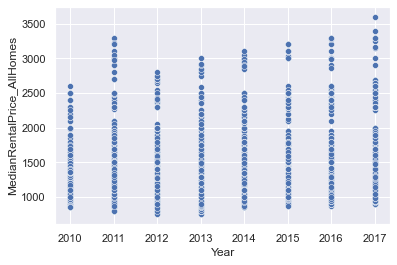

In [529]:
#Viewing missing values
sns.scatterplot( y =new['MedianRentalPrice_AllHomes'], x = new['Year'], data=new)

<AxesSubplot:xlabel='Year', ylabel='PctOfHomesIncreasingInValues_AllHomes'>

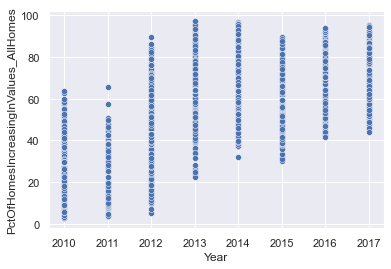

In [534]:
#Viewing missing values
sns.scatterplot( y =new['PctOfHomesIncreasingInValues_AllHomes'], x = new['Year'], data=new)

In [531]:
#Replacing missing values with mean and 0
new['MedianRentalPrice_AllHomes'] = new['MedianRentalPrice_AllHomes'].fillna(new.groupby('Year')['MedianRentalPrice_AllHomes'].transform('mean'))
new['PctOfHomesIncreasingInValues_AllHomes'] = new['PctOfHomesIncreasingInValues_AllHomes'].fillna(new.groupby('Year')['PctOfHomesIncreasingInValues_AllHomes'].transform('mean'))
new = new.replace(np.nan,0)
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 8221 to 13211
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              4991 non-null   datetime64[ns]
 1   RegionName                                        4991 non-null   int8          
 2   DaysOnZillow_AllHomes                             4991 non-null   float64       
 3   InventorySeasonallyAdjusted_AllHomes              4991 non-null   float64       
 4   MedianListingPricePerSqft_AllHomes                4991 non-null   float64       
 5   MedianPctOfPriceReduction_AllHomes                4991 non-null   float64       
 6   MedianRentalPrice_AllHomes                        4991 non-null   float64       
 7   PctOfHomesIncreasingInValues_AllHomes             4991 non-null   float64       
 8   PctOfListingsWithPriceRe

In [519]:
#Viewing correlation among remaining features
new.corr()

RegionName  \
RegionName                                          1.000000   
DaysOnZillow_AllHomes                               0.029931   
InventorySeasonallyAdjusted_AllHomes               -0.071253   
MedianListingPricePerSqft_AllHomes                 -0.193500   
MedianPctOfPriceReduction_AllHomes                 -0.001991   
MedianRentalPrice_AllHomes                         -0.116059   
PctOfHomesIncreasingInValues_AllHomes              -0.033937   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes   -0.156177   
PctOfListingsWithPriceReductions_AllHomes          -0.142868   
PriceToRentRatio_AllHomes                          -0.086221   
Year                                               -0.000377   
ZHVI_AllHomes                                      -0.208955   

                                                  DaysOnZillow_AllHomes  \
RegionName                                                     0.029931   
DaysOnZillow_AllHomes                                          1.000000   
InventorySeasonallyAdjusted_AllHomes                           0.178337   
MedianListingPricePerSqft_AllHomes                            -0.116616   
MedianPctOfPriceReduction_AllHomes                             0.138955   
MedianRentalPrice_AllHomes                                     0.010056   
PctOfHomesIncreasingInValues_AllHomes                         -0.476431   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes              -0.174836   
PctOfListingsWithPriceReductions_AllHomes                     -0.234223   
PriceToRentRatio_AllHomes                                     -0.235631   
Year                                                          -0.419119   
ZHVI_AllHomes                                                 -0.134388   

                                                  InventorySeasonallyAdjusted_AllHomes  \
RegionName                                                                   -0.071253   
DaysOnZillow_AllHomes                                                         0.178337   
InventorySeasonallyAdjusted_AllHomes                                          1.000000   
MedianListingPricePerSqft_AllHomes                                           -0.150392   
MedianPctOfPriceReduction_AllHomes                                            0.078405   
MedianRentalPrice_AllHomes                                                    0.138371   
PctOfHomesIncreasingInValues_AllHomes                                        -0.183236   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes                              0.066540   
PctOfListingsWithPriceReductions_AllHomes                                     0.059687   
PriceToRentRatio_AllHomes                                                    -0.089562   
Year                                                                         -0.165116   
ZHVI_AllHomes                                                                -0.036185   

                                                  MedianListingPricePerSqft_AllHomes  \
RegionName                                                                 -0.193500   
DaysOnZillow_AllHomes                                                      -0.116616   
InventorySeasonallyAdjusted_AllHomes                                       -0.150392   
MedianListingPricePerSqft_AllHomes                                          1.000000   
MedianPctOfPriceReduction_AllHomes                                          0.032256   
MedianRentalPrice_AllHomes                                                  0.625026   
PctOfHomesIncreasingInValues_AllHomes                                       0.232731   
PctOfListingsWithPriceReductionsSeasAdj_AllHomes                            0.084261   
PctOfListingsWithPriceReductions_AllHomes                                   0.084194   
PriceToRentRatio_AllHomes                                                   0.420193   
Year                                                                        0.181431   
ZHVI_AllHomes 

In [546]:
#Splitting into dependent and independent variables
x = new.drop(['ZHVI_AllHomes','Date'],axis=1)
y = new['ZHVI_AllHomes']
x

RegionName  DaysOnZillow_AllHomes  \
8221            0                  169.0   
8222            1                  130.0   
8223            2                  112.0   
8224            3                  121.0   
8225            4                  108.0   
...           ...                    ...   
13207          47                    0.0   
13208          48                    0.0   
13209          49                    0.0   
13210          50                    0.0   
13211          51                    0.0   

       InventorySeasonallyAdjusted_AllHomes  \
8221                                32616.0   
8222                                 3477.0   
8223                                50221.0   
8224                                18475.0   
8225                               138652.0   
...                                     ...   
13207                               39599.0   
13208                               17918.0   
13209                                9800.0   
13210                               27273.0   
13211                                4337.0   

       MedianListingPricePerSqft_AllHomes  MedianPctOfPriceReduction_AllHomes  \
8221                            96.206908                            0.000000   
8222                           153.623950                            0.000000   
8223                             0.000000                            0.000000   
8224                            88.664872                            0.000000   
8225                             0.000000                            0.000000   
...                                   ...                                 ...   
13207                          147.928994                            2.713158   
13208                          201.418209                            3.032141   
13209                           89.392679                            5.099051   
13210                          128.536977                            3.717472   
13211                          154.707232                            3.922126   

       MedianRentalPrice_AllHomes  PctOfHomesIncreasingInValues_AllHomes  \
8221                  1365.670251                              36.560000   
8222                  1365.670251                              29.467870   
8223                  1365.670251                               5.730000   
8224                  1365.670251                              50.240000   
8225                  1365.670251                              20.460000   
...                           ...                                    ...   
13207                 1600.000000                              54.740000   
13208                 1900.000000                              90.380000   
13209                  980.000000                              44.070000   
13210                 1150.000000                              72.210000   
13211                 1050.000000                              73.687801   

       PctOfListingsWithPriceReductionsSeasAdj_AllHomes  \
8221                                           0.000000   
8222                                           0.000000   
8223                                           0.000000   
8224                                           0.000000   
8225                                           0.000000   
...                                                 ...   
13207                                         12.911371   
13208                                          9.595213   
13209                                         11.552286   
13210                                         10.137563   
13211                                          9.180009   

       PctOfListingsWithPriceReductions_AllHomes  PriceToRentRatio_AllHomes  \
8221                                    0.000000                       0.00   
8222                                    0.000000                       0.00   
8223                                    0.000000                       0.00   
82

In [582]:
#Importing required models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [583]:
#Train_test_split
xtr,xte,ytr,yte = train_test_split(x,y)

In [584]:
#Standardization of all the features
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
xtr = st.fit_transform(xtr)
xte = st.fit_transform(xte)

### LinearRegressor

In [652]:
model1 = LinearRegression()
model1.fit(xtr,ytr)

LinearRegression()

In [653]:
pred1 = model1.predict(xte)

In [654]:
prediction1 = pd.DataFrame(pred1)

In [655]:
mae1 = mean_absolute_error(yte,prediction1)
mae1

23782.65023488705

In [656]:
mse1 = mean_squared_error(yte,prediction1)
rmse1 = np.sqrt(mse1)
rmse1

34875.21659716189

In [657]:
score1=model1.score(xte, yte)
score1

0.8476461937949298

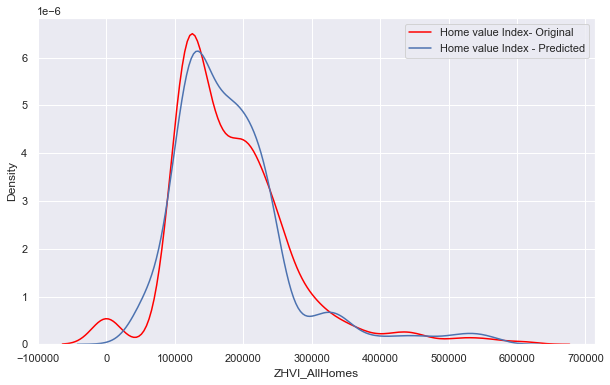

In [658]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(10,6))
sns.kdeplot(yte,label='Home value Index- Original',color='red')
sns.kdeplot(prediction1[0],label='Home value Index - Predicted')
plt.legend()

### SGDRegressor

In [659]:
model2 = SGDRegressor()
model2.fit(xtr,ytr)

SGDRegressor()

In [660]:
pred2 = model2.predict(xte)

In [661]:
prediction2 = pd.DataFrame(pred2)

In [662]:
mae2 = mean_absolute_error(yte,prediction2)
mae2

23916.397254750384

In [663]:
mse2 = mean_squared_error(yte,prediction2)
rmse2 = np.sqrt(mse2)
rmse2

34986.710106083774

In [664]:
score2= model2.score(xte, yte)
score2

0.8466705088045324

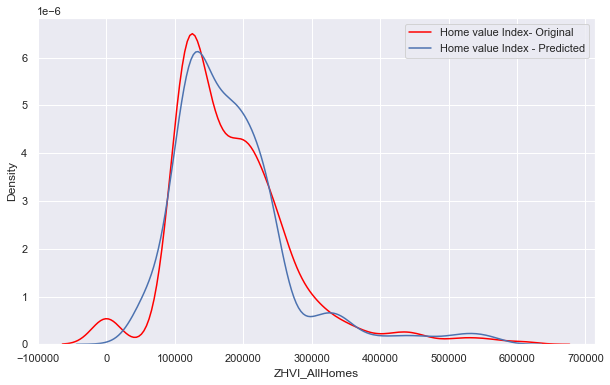

In [665]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(10,6))
sns.kdeplot(yte,label='Home value Index- Original',color='red')
sns.kdeplot(prediction2[0],label='Home value Index - Predicted')
plt.legend()

# RandomForestRegressor

In [642]:
model3 = RandomForestRegressor()
model3.fit(xtr,ytr)

RandomForestRegressor()

In [643]:
pred3 = model3.predict(xte)

In [644]:
prediction3 = pd.DataFrame(pred3)

In [645]:
mae3 = mean_absolute_error(yte,prediction3)
mae3

4729.148237179487

In [646]:
mse3 = mean_squared_error(yte,prediction3)
rmse3 = np.sqrt(mse3)
rmse3

14818.131742366668

In [651]:
score3= model3.score(xte, yte)
score3

0.9724953334188974

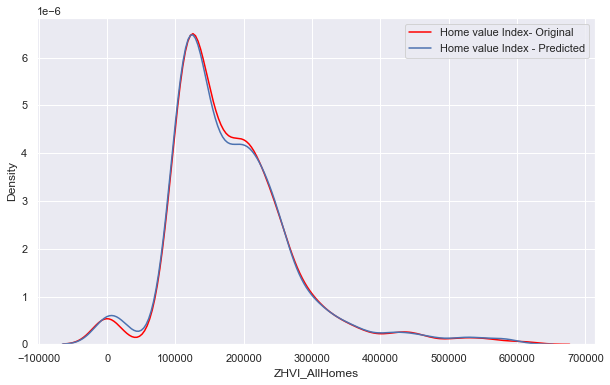

In [648]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(10,6))
sns.kdeplot(yte,label='Home value Index- Original',color='red')
sns.kdeplot(prediction3[0],label='Home value Index - Predicted')
plt.legend()

In [670]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
model_performance = {
    'Model' : ['LinearRegressor', 'SGDRegressor', 'RandomForestRegressor'],
    'MAE' : [mae1, mae2, mae3],
    'RMSE' : [rmse1, rmse2, rmse3],
    'Score' : [score1, score2, score3], 
}
  
# creating a Dataframe object 
model_performance = pd.DataFrame(model_performance)
model_performance

Model           MAE          RMSE     Score
0        LinearRegressor  23782.650235  34875.216597  0.847646
1           SGDRegressor  23916.397255  34986.710106  0.846671
2  RandomForestRegressor   4729.148237  14818.131742  0.972495

Among, the three models [LinearRegressor, SGDRegressor, RandomForestRegressor], RandomForestRegressor performed the best.

# ARIMA

In [700]:
df= zhvi.iloc[:, 5:]

In [701]:
df= pd.DataFrame(df.reset_index())

In [702]:
df.head()

Date  AllHomes
0 1996-04-30   95700.0
1 1996-05-31   94300.0
2 1996-06-30   94400.0
3 1996-07-31   94450.0
4 1996-08-31   94450.0

In [703]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      261 non-null    datetime64[ns]
 1   AllHomes  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


Text(0, 0.5, 'AllHomes')

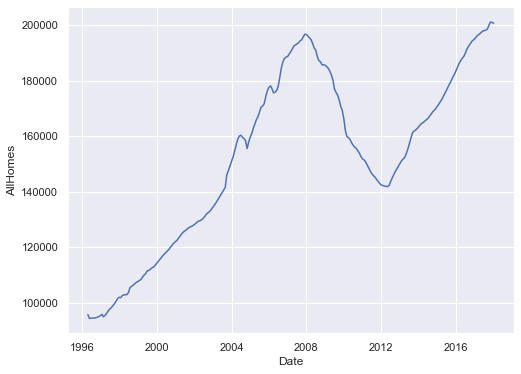

In [704]:
plt.figure(figsize=(8,6))
plt.plot(df['Date'],df['AllHomes'])
plt.xlabel('Date')
plt.ylabel('AllHomes')

In [705]:
df['moving'] = df['AllHomes'].rolling(5).mean() #moving average
df

Date  AllHomes    moving
0   1996-04-30   95700.0       NaN
1   1996-05-31   94300.0       NaN
2   1996-06-30   94400.0       NaN
3   1996-07-31   94450.0       NaN
4   1996-08-31   94450.0   94660.0
..         ...       ...       ...
256 2017-08-31  198600.0  197970.0
257 2017-09-30  199950.0  198500.0
258 2017-10-31  201100.0  199160.0
259 2017-11-30  200900.0  199740.0
260 2017-12-31  200650.0  200240.0

[261 rows x 3 columns]

In [706]:
df.fillna(0,inplace=True)
df

Date  AllHomes    moving
0   1996-04-30   95700.0       0.0
1   1996-05-31   94300.0       0.0
2   1996-06-30   94400.0       0.0
3   1996-07-31   94450.0       0.0
4   1996-08-31   94450.0   94660.0
..         ...       ...       ...
256 2017-08-31  198600.0  197970.0
257 2017-09-30  199950.0  198500.0
258 2017-10-31  201100.0  199160.0
259 2017-11-30  200900.0  199740.0
260 2017-12-31  200650.0  200240.0

[261 rows x 3 columns]

<AxesSubplot:>

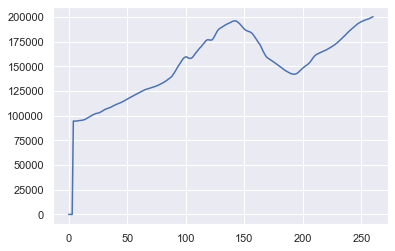

In [707]:
df.moving.plot(kind='line')

Text(0, 0.5, 'AllHomes')

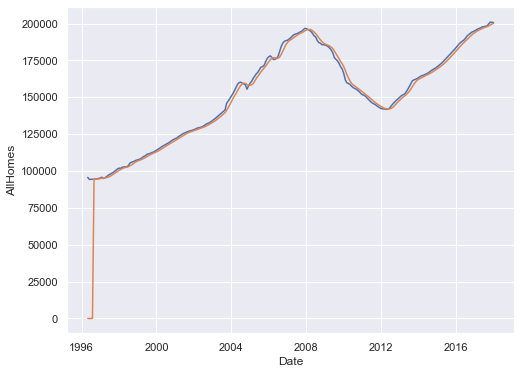

In [710]:
plt.figure(figsize=(8,6))
plt.plot(df['Date'],df['AllHomes'])
plt.plot(df['Date'],df['moving'])
plt.xlabel('Date')
plt.ylabel('AllHomes')

In [711]:
#seasonality check 
df['month'] = [d.strftime('%b') for d in df.Date]
df['month'].unique()

array(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar'], dtype=object)

In [712]:
df['year'] = [d.strftime('%Y') for d in df.Date]

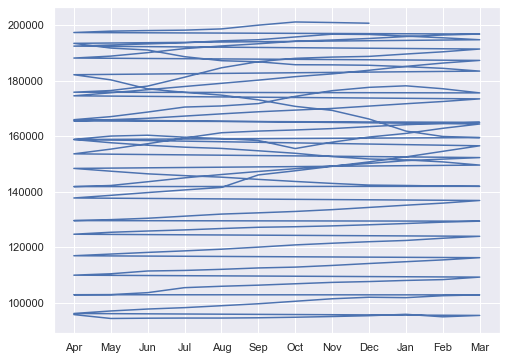

In [713]:
plt.figure(figsize=(8,6))
plt.plot(df['month'],df['AllHomes'])

<AxesSubplot:xlabel='month', ylabel='AllHomes'>

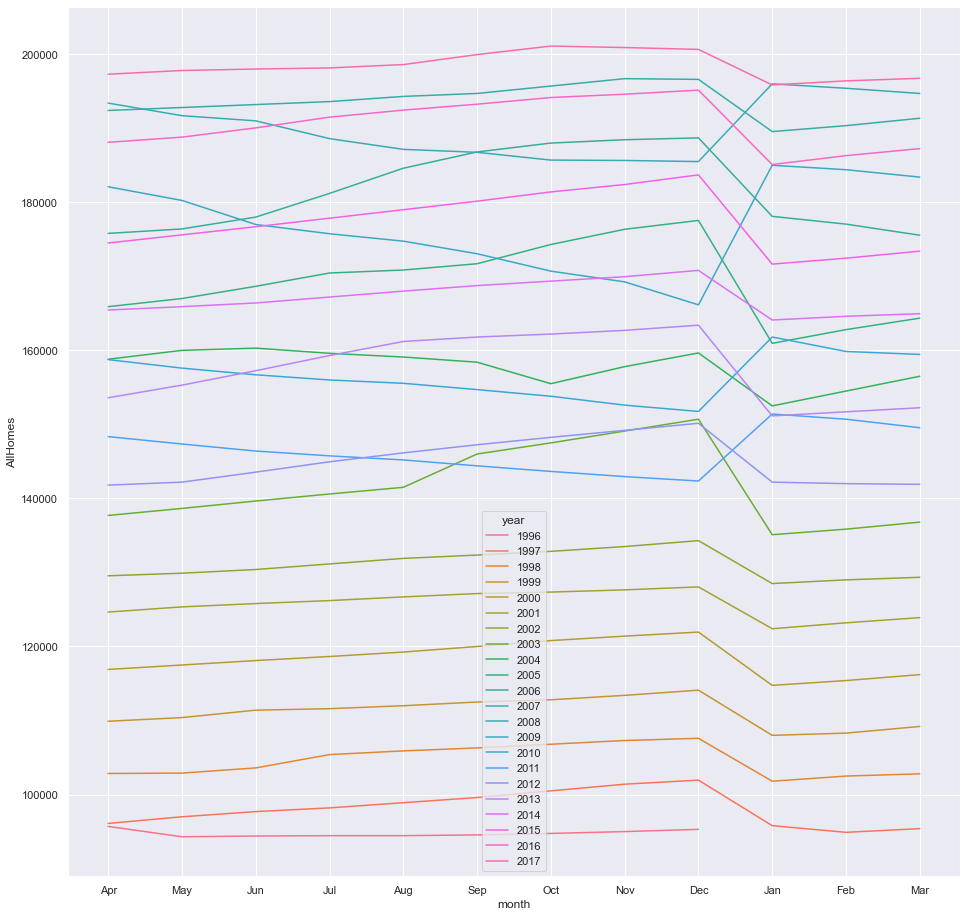

In [714]:
plt.figure(figsize=(16,16))
sns.lineplot(x='month',y='AllHomes', hue= 'year', data=df)

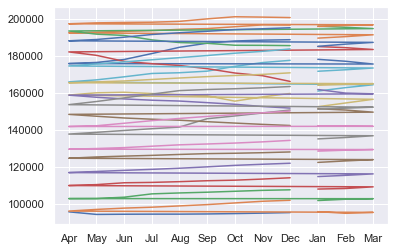

In [715]:
yr = df['year'].unique()
for i, j in enumerate(yr):
    plt.plot('month','AllHomes',data=df.loc[df.year == j,:])

In [716]:
from statsmodels.tsa.seasonal import seasonal_decompose

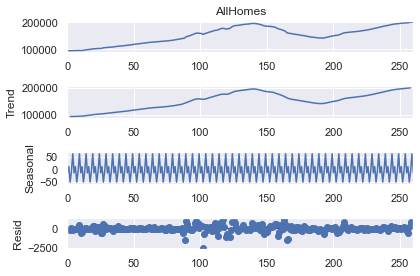

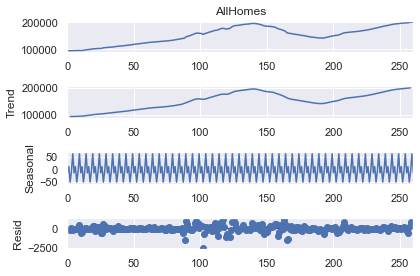

In [717]:
dec_add = seasonal_decompose(df['AllHomes'],model = 'additive',period=5)
dec_add.plot()

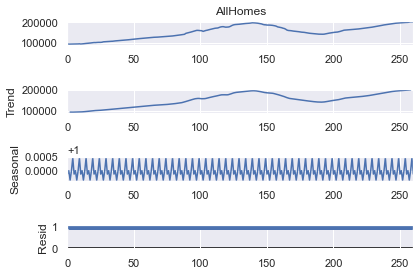

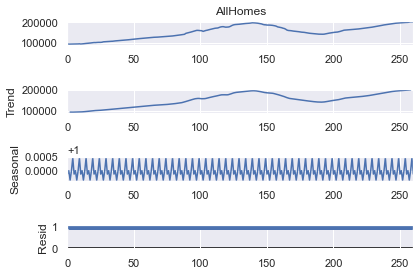

In [718]:
dec_mul = seasonal_decompose(df['AllHomes'],model = 'multiplicative',period=5)
dec_mul.plot()

In [719]:
data = pd.concat([dec_mul.seasonal, dec_mul.trend, dec_mul.resid, dec_mul.observed],axis=1)
data

seasonal     trend     resid  AllHomes
0    0.999880       NaN       NaN   95700.0
1    1.000002       NaN       NaN   94300.0
2    0.999662   94660.0  0.997590   94400.0
3    0.999995   94430.0  1.000216   94450.0
4    1.000461   94520.0  0.998799   94450.0
..        ...       ...       ...       ...
256  1.000002  199160.0  0.997186  198600.0
257  0.999662  199740.0  1.001390  199950.0
258  0.999995  200240.0  1.004299  201100.0
259  1.000461       NaN       NaN  200900.0
260  0.999880       NaN       NaN  200650.0

[261 rows x 4 columns]

<AxesSubplot:>

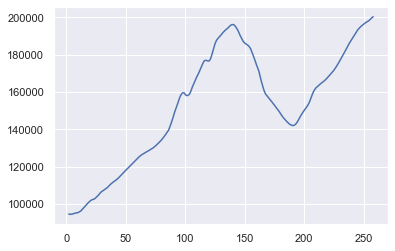

In [720]:
data.trend.plot()

<AxesSubplot:>

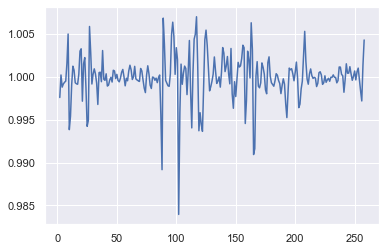

In [721]:
data.resid.plot()

In [722]:
# stationary
from statsmodels.tsa.stattools import adfuller

In [723]:
st = adfuller(df['AllHomes'],autolag='AIC')
st

(-2.206903922842596,
 0.2037492803559594,
 14,
 246,
 {'1%': -3.457215237265747,
  '5%': -2.873361841566324,
  '10%': -2.5730700760129555},
 3863.5801659854396)

In [724]:
print('test stats = ', st[0])
print('critical value = ', st[4])

test stats =  -2.206903922842596
critical value =  {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}


In [725]:
df.head()

Date  AllHomes   moving month  year
0 1996-04-30   95700.0      0.0   Apr  1996
1 1996-05-31   94300.0      0.0   May  1996
2 1996-06-30   94400.0      0.0   Jun  1996
3 1996-07-31   94450.0      0.0   Jul  1996
4 1996-08-31   94450.0  94660.0   Aug  1996

In [726]:
# n-order differencing
y = df['AllHomes'].diff().fillna(0)
y
st2 = adfuller(y,autolag='AIC')
st2

(-1.7948003385982934,
 0.3830462198287887,
 13,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 3866.4413660133714)

In [727]:
print('test stats = ', st2[0])
print('critical value = ', st2[4])

test stats =  -1.7948003385982934
critical value =  {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}


In [728]:
#2-order differencing
y = df['AllHomes'].diff().diff().fillna(0)
y
st3 = adfuller(y,autolag='AIC')
st3

(-6.951284539505381,
 9.678099619336693e-10,
 12,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 3867.7841430459303)

In [729]:
#Test_stat vs Critical Value
print('test stats = ', st3[0])
print('critical value = ', st3[4])

test stats =  -6.951284539505381
critical value =  {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}


In [730]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



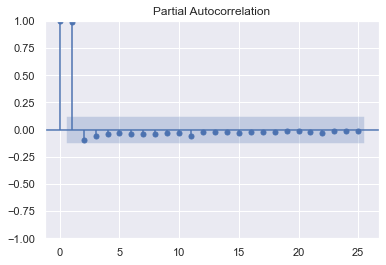

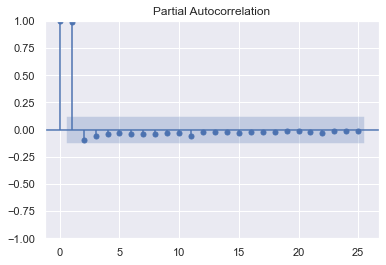

In [731]:
plot_pacf(df['AllHomes'])

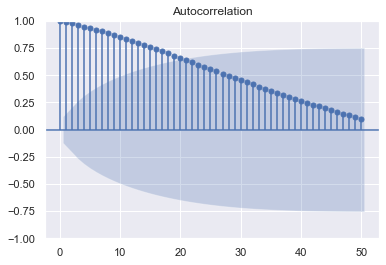

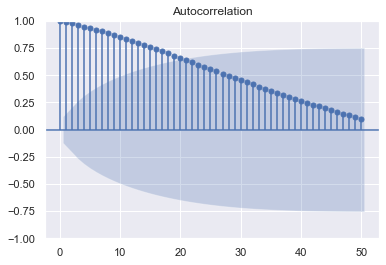

In [732]:
# p = 2 is optimal value for the graph
plot_acf(df['AllHomes'], lags=50)

In [733]:
df.drop(columns= ['month','year'] ,inplace=True)
df

Date  AllHomes    moving
0   1996-04-30   95700.0       0.0
1   1996-05-31   94300.0       0.0
2   1996-06-30   94400.0       0.0
3   1996-07-31   94450.0       0.0
4   1996-08-31   94450.0   94660.0
..         ...       ...       ...
256 2017-08-31  198600.0  197970.0
257 2017-09-30  199950.0  198500.0
258 2017-10-31  201100.0  199160.0
259 2017-11-30  200900.0  199740.0
260 2017-12-31  200650.0  200240.0

[261 rows x 3 columns]

In [734]:
train = df.iloc[:-61]
test = df.iloc[-61:]
test

Date  AllHomes    moving
200 2012-12-31  150150.0  148200.0
201 2013-01-31  151150.0  149200.0
202 2013-02-28  151700.0  150090.0
203 2013-03-31  152250.0  150890.0
204 2013-04-30  153600.0  151770.0
..         ...       ...       ...
256 2017-08-31  198600.0  197970.0
257 2017-09-30  199950.0  198500.0
258 2017-10-31  201100.0  199160.0
259 2017-11-30  200900.0  199740.0
260 2017-12-31  200650.0  200240.0

[61 rows x 3 columns]

In [735]:
from statsmodels.tsa.arima.model import ARIMA

In [736]:
model = ARIMA(train['moving'],order=(2,2,30))
results = model.fit()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [737]:
train = train.rolling(10).mean()
train.fillna(0,inplace=True)

In [751]:
y_pred = results.predict(start=200,end=280)

In [752]:
y_pred

200    147740.224862
201    148640.081347
202    149520.605507
203    151073.120249
204    150264.322683
           ...      
276    238660.691666
277    239743.051443
278    241200.446077
279    242443.434140
280    243719.069554
Name: predicted_mean, Length: 81, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ARIMA prediction')

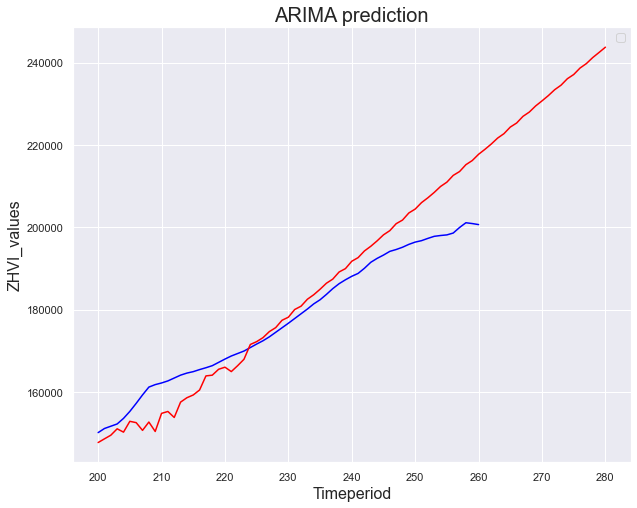

In [753]:
plt.figure(figsize=(10,8))
plt.plot(test['AllHomes'], color= 'blue')
plt.plot(y_pred, color= 'red')

plt.legend()
plt.xlabel('Timeperiod', fontsize=16);
plt.ylabel('ZHVI_values', fontsize=16);
plt.title('ARIMA prediction', fontsize=20)
